In [41]:
# This code come from Python Machine Learning Cookbook by Chris Albon

## Chapter 1: Vectors, Matrices, and Arrays

#### Create Arrays and matrices

In [3]:
import numpy as np

row = np.array([1,2,3])
columns = np.array([[1],[2],[3]])

matrix = np.mat([[1,2], [3,4], [5,6]])

#### Create Sparse Matrix: Stores only nonzero elements

In [9]:
from scipy import sparse

matrix_large = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [3, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

matrix_sparse = sparse.csr_matrix(matrix_large)
print(matrix_sparse)

  (1, 1)	1
  (2, 0)	3


#### Selecting Elements

In [17]:
matrix[2:] # select everything after element
matrix[:2] # select all rows including n-th
matrix[1] # select row
matrix[-1] # select last element 
matrix[:2, 1:] # select submatrix

matrix([[2],
        [4]])

#### Describing Matrices

In [26]:
matrix.shape # number or rows and col
matrix.ndim # number of dimension
matrix.size # number of elements (rows x col)

array([3, 6, 9])

#### Apply Operations to elements in array

In [23]:
# create matrix
matrix = np.array([
    [1,2,3],
    [4,5,6],
    [7,8,9]
])

# create function
add_100 = lambda i:i +100

# create vectorized function
vectorized_add_100 = np.vectorize(add_100)

# call function
vectorized_add_100(matrix)

# is equivalent to
matrix + 100

array([[101, 102, 103],
       [104, 105, 106],
       [107, 108, 109]])

#### Find max and min in array

In [27]:
np.max(matrix) # find max element
np.min(matrix) # find min element
np.max(matrix, axis = 0) # find max element of each col
np.max(matrix, axis = 1) # find max element of each row 

array([3, 6, 9])

#### Calculate mean, standart deviation, variance 

In [33]:
np.mean(matrix, axis = 0) # calculate mean of each col
np.std(matrix, axis = 1) # calculate standart deviation of each rows
np.var(matrix, axis = 0) # calculate variance of each col

array([6., 6., 6.])

#### Reshaping Arrays: use matrix.size

In [39]:
matrix.reshape(1,9) # change matrix shape to 1 row, 9 col
matrix.reshape(1,-1) # change matrice to one row (as many col needed)
matrix.reshape(9) # create 1-D array
matrix.flatten() # create 1-D array

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

#### Transpose matrix

In [38]:
matrix.transpose() # transpose matrix 
matrix.T # transpose matrix

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

#### Linear Algebra


In [61]:
np.linalg.matrix_rank(matrix) # Find Matrix Rank: max of linear independant rows

np.linalg.det(matrix) # Calculate Determinant of a matrix 

matrix.diagonal() # find matrix diagonal
matrix.diagonal(offset = 1) # find matrix diagonal with one above

matrix.trace() # return trace: sum of diagonal element
sum(matrix.diagonal()) # return trace: sum of diagonal element

eigenvalues, eigenvectors = np.linalg.eig(matrix) # Find eighten values and eighten vectors

np.dot(matrix, matrix) # multiplication matricielle
np.add(matrix, matrix) # addition matricielle
np.subtract(matrix, matrix) # soustraction matricielle
matrix + matrix # addition matricielle
matrix @ matrix # multiplication matricielle
matrix * matrix # element-wise multiplication

mat_squared = np.array([
    [1,2],
    [3,4]
])

np.linalg.inv(mat_squared) # return inverse of matrix
mat_squared @ np.linalg.inv(mat_squared)

array([[1.0000000e+00, 0.0000000e+00],
       [8.8817842e-16, 1.0000000e+00]])

#### Generating random values 

In [70]:
np.random.seed(420) # set seed for reproductive values
np.random.random(3) # generate 3 random float between 0,1
np.random.randint(0,11,3) # generate 3 random num between 0,10
np.random.normal(0,1,3) # generate normal distribution with mean 0 and std of 1
np.random.logistic(0,1,3) # generate 3 rand numb from logistic reg with mean 0 and scale of 1
np.random.uniform(2,5,3) # generate 3 rand element between [2,5[

array([2.7113966 , 2.70621101, 4.32311415])

## Chapter 2: Loading Data 

In [ ]:
####  Create simulated dataset for regr

#### Load preexisting dataset 

In [77]:
from sklearn import datasets

digits = datasets.load_digits() # load dataset
digits # view its columns
features = digits.data # load features matrix
target = digits.target # load target matrix
features[0] # view first row

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

####  Create simulated dataset for regression

In [79]:
from sklearn.datasets import make_regression

features, target, coefficients = make_regression(
    n_samples = 100,
    n_features = 3,
    n_informative = 3,
    n_targets = 1,
    noise = 0,
    coef = True,
    random_state = 420
)

print('Features Matrix\n', features[:3])
print('Target Vector\n', target[:3])

# n_informative: number of features used to create target

Features Matrix
 [[ 0.88927717 -0.98514348  0.14545183]
 [ 0.57073084  0.0653164   0.67641123]
 [-0.12873466 -0.17049738  1.74133681]]
Target Vector
 [  9.82952567  74.59668467 108.37143506]


####  Create simulated dataset for classification

In [81]:
from sklearn.datasets import make_classification

features, target = make_classification(
    n_samples = 100,
    n_features = 3,
    n_informative =3,
    n_redundant = 0,
    n_classes = 2,
    weights =[.25, .75],
    random_state = 420
)

print('Features Matrix\n', features[:3])
print('Target Vector\n', target[:3])

# weights: create imbalance in classes

Features Matrix
 [[ 2.2062126  -0.09854505  0.43939749]
 [ 1.02605503 -0.84677005 -1.01515178]
 [ 0.61771459 -1.05462148  2.81549146]]
Target Vector
 [1 1 0]


#### Create simulated dataset for clustering



In [88]:
from sklearn.datasets import make_blobs

feature, target = make_blobs(
    n_samples = 100,
    n_features = 2,
    centers =3,
    cluster_std =0.5,
    shuffle = True,
    random_state = 420
)
print('Feature Matrix\n', features[:3])
print('Target Vector\n', target[:3])

# center: number of cluster generated

Feature Matrix
 [[ 2.2062126  -0.09854505  0.43939749]
 [ 1.02605503 -0.84677005 -1.01515178]
 [ 0.61771459 -1.05462148  2.81549146]]
Target Vector
 [0 0 1]


#### Visualize clustering 

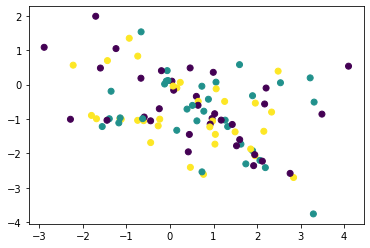

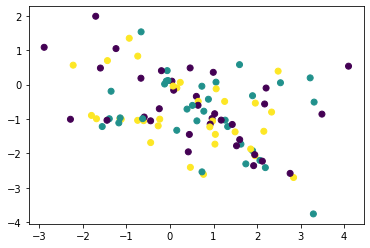

In [90]:
import matplotlib.pyplot as plt

plt.scatter(features[:,0], features[:,1], c=target)
plt.show()

#### Load CSV File 

In [106]:
import pandas as pd

url = 'https://tinyurl.com/titanic-csv'

titanic = pd.read_csv(url) # load csv file
titanic.head()

,Name,PClass,Age,Sex,Survived,SexCode
0,"Allen, Miss Elisabeth Walton",1st,29.00,female,1,1
1,"Allison, Miss Helen Loraine",1st,2.00,female,0,1
2,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0,0
3,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0,1
4,"Allison, Master Hudson Trevor",1st,0.92,male,1,0


## Chap 3: Data Wrangling 

#### Create Dataframe 

In [102]:
df = pd.DataFrame()

# Add columns
df['Name'] = ['Jacky Jackson', 'Steven Stevenson']
df['Age'] = [38, 25]
df['Driver'] = [True, False]

# create row
new_person = pd.Series(['Molly Brown', 25, False],
                       index = ['Name', 'Age', 'Driver'])

# add new row to df
df.append(new_person, ignore_index = True)
df.append(new_person, ignore_index=True)

,Name,Age,Driver
0,Jacky Jackson,38,True
1,Steven Stevenson,25,False
2,Molly Brown,25,False


#### Describe Data 

In [127]:
df.info()
df.describe()
df.shape
df.keys()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 3 columns):
Name      2 non-null object
Age       2 non-null int64
Driver    2 non-null bool
dtypes: bool(1), int64(1), object(1)
memory usage: 114.0+ bytes


Index(['Name', 'Age', 'Driver'], dtype='object')

#### Navigating Dataframe 

In [115]:
titanic.iloc[0] # select first row
titanic.iloc[:3] # select first 3 rows
titanic.iloc[4:6] # select 4 and 5th rows

,Name,PClass,Age,Sex,Survived,SexCode
4,"Allison, Master Hudson Trevor",1st,0.92,male,1,0
5,"Anderson, Mr Harry",1st,47.00,male,1,0


#### Filtering rows based on Conditionals

In [119]:
titanic[(titanic['Sex'] == 'female') & (titanic['Age'] >=65)]

,Name,PClass,Age,Sex,Survived,SexCode
73,"Crosby, Mrs Edward Gifford (Catherine Elizabet...",1st,69.0,female,1,1


#### Replacing Values

In [132]:
titanic['Sex'].replace(['female', 'male'], ['woman', 'man']).head()

titanic['PClass'].replace(['1st', '2nd', '3rd'], ['first', 'second', 'third']).head()

titanic['Survived'].replace([1,0], ['Yes', 'No']).head()

0    Yes
1     No
2     No
3     No
4    Yes
Name: Survived, dtype: object

#### Renaming Columns 

In [133]:
titanic.rename(columns ={'PClass': 'Passenger Class', 'Sex':'Gender'}).head()

,Name,Passenger Class,Age,Gender,Survived,SexCode
0,"Allen, Miss Elisabeth Walton",1st,29.00,female,1,1
1,"Allison, Miss Helen Loraine",1st,2.00,female,0,1
2,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0,0
3,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0,1
4,"Allison, Master Hudson Trevor",1st,0.92,male,1,0


#### Find min, max, sum, average, count 

In [145]:
titanic['Age'].max()
titanic['Age'].min()
titanic['Age'].mean()
titanic['Age'].sum()
titanic.count()

titanic['Sex'].unique() # get classes variables
titanic['Sex'].nunique() # get number of different classes
titanic['Sex'].value_counts() # count elements by classes

male      851
female    462
Name: Sex, dtype: int64

####  Handling missing values

In [148]:
# find missing values in column
titanic[(titanic['Age'].isnull())].head()

# replace values with nan
titanic['Sex'].replace("male", np.nan).head()



0    female
1    female
2       NaN
3    female
4       NaN
Name: Sex, dtype: object

#### Deleting Columns, Rows 

In [153]:
titanic.drop(['SexCode'], axis=1).head() # delete columns

titanic[(titanic['Sex'] != 'male')].head() # delete all male rows
titanic[(titanic['Age'] <=1)].head()

,Name,PClass,Age,Sex,Survived,SexCode
4,"Allison, Master Hudson Trevor",1st,0.92,male,1,0
339,"Becker, Master Richard F",2nd,1.00,male,1,0
358,"Caldwell, Master Alden Gates",2nd,0.83,male,1,0
425,"Hamalainen, Master Viljo",2nd,1.00,male,1,0
478,"LaRoche, Miss Louise",2nd,1.00,female,1,1


#### Drop Duplicate Rows 

In [158]:
titanic.drop_duplicates().head()

print("Number Of Rows In The Original DataFrame:", len(titanic))
print("Number Of Rows After Deduping:", len(titanic.drop_duplicates()))

titanic.drop_duplicates(subset=['Sex'], keep='last')

Number Of Rows In The Original DataFrame: 1313
Number Of Rows After Deduping: 1313


,Name,PClass,Age,Sex,Survived,SexCode
1307,"Zabour, Miss Tamini",3rd,NaN,female,0,1
1312,"Zimmerman, Leo",3rd,29.0,male,0,0


#### Group By

In [169]:
titanic.groupby(['Sex']).count()
titanic.groupby(['Sex']).mean()

titanic.groupby(['Survived'])['PClass'].count()
titanic.groupby(['Sex', 'Survived', 'PClass'])['Age'].mean()

Sex     Survived  PClass
female  0         1st       35.200000
                  2nd       31.400000
                  3rd       22.821429
        1         1st       37.906250
                  2nd       26.853333
                  3rd       22.721087
male    0         *               NaN
                  1st       44.841463
                  2nd       31.698113
                  3rd       27.099620
        1         1st       34.253953
                  2nd       14.839524
                  3rd       22.088437
Name: Age, dtype: float64

#### Grouping Rows by Time 

In [176]:
# create date range
time_index = pd.date_range('06/06/2017', periods=100000, freq='30S')

# Create DataFrame
dataframe = pd.DataFrame(index=time_index)

# create column of random values
dataframe['Sales'] = np.random.randint(1000, 2000, 100000)

# Group rows by week and calculate sum
dataframe.resample('W').sum()

,Sales
2017-06-11,25954467
2017-06-18,30250160
2017-06-25,30212429
2017-07-02,30243526
2017-07-09,30251502
2017-07-16,3124214


#### Looping over columns 

In [177]:
for name in titanic['Name'][0:3]:
    print(name.upper())

ALLEN, MISS ELISABETH WALTON
ALLISON, MISS HELEN LORAINE
ALLISON, MR HUDSON JOSHUA CREIGHTON


#### Apply function on all elements 

In [180]:
# create function
def uppercase(x):
    return x.upper()

# apply function on all elements
titanic['Name'].apply(uppercase)[0:4]

# applyc function by groups
titanic.groupby('Sex').apply(lambda x: x.count())

,Name,PClass,Age,Sex,Survived,SexCode
Sex,,,,,,
female,462,462,288,462,462,462
male,851,851,468,851,851,851


#### Concatenating dataframe by rows 

In [184]:
# Create DataFrame A
data_a = {'id': ['1', '2', '3'],
 'first': ['Alex', 'Amy', 'Allen'],
 'last': ['Anderson', 'Ackerman', 'Ali']}
dataframe_a = pd.DataFrame(data_a, columns = ['id', 'first', 'last'])

# Create DataFrame B
data_b = {'id': ['4', '5', '6'],
 'first': ['Billy', 'Brian', 'Bran'],
 'last': ['Bonder', 'Black', 'Balwner']}
dataframe_b = pd.DataFrame(data_b, columns = ['id', 'first', 'last'])


# Concatenate DataFrames by rows
pd.concat([dataframe_a, dataframe_b], axis=0)

,id,first,last
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner


#### Merging Dataframe by columns 

In [185]:
# Create DataFrame A
employee_data = {'employee_id': ['1', '2', '3', '4'],
 'name': ['Amy Jones', 'Allen Keys', 'Alice Bees',
 'Tim Horton']}
dataframe_employees = pd.DataFrame(employee_data, columns = ['employee_id',
 'name'])

# Create DataFrame B
sales_data = {'employee_id': ['3', '4', '5', '6'],
 'total_sales': [23456, 2512, 2345, 1455]}
dataframe_sales = pd.DataFrame(sales_data, columns = ['employee_id',
 'total_sales'])

# Merge DataFrames
pd.merge(dataframe_employees, dataframe_sales, on='employee_id')

,employee_id,name,total_sales
0,3,Alice Bees,23456
1,4,Tim Horton,2512


## Chap 4: Handling Numerical Data 

#### Rescaling a Numerical feature between 0,1 with MinMax


In [196]:
from sklearn.preprocessing import MinMaxScaler

feature = np.array([[-500.5],
 [-100.1],
 [0],
 [100.1],
 [900.9]])

# creater scaler
minmax_scale = preprocessing.MinMaxScaler(feature_range = (0,1))

# scaled feature
scaled_feature = minmax_scale.fit_transform(feature)

scaled_feature

array([[0.        ],
       [0.28571429],
       [0.35714286],
       [0.42857143],
       [1.        ]])

#### Standardizing feature using mean and standard deviation

In [198]:
from sklearn.preprocessing import StandardScaler, RobustScaler

x = np.array([[-1000.1],
 [-200.2],
 [500.5],
 [600.6],
 [9000.9]])

# create scaler
scaler = StandardScaler() # classical standardizer
robust_scaler = RobustScaler() # if features has outliers

# transform features
standardized_features = scaler.fit_transform(x)

standardized_features

print('Mean: ', standardized_features.mean())
print('Standard deviation: ', standardized_features.std())

Mean:  4.4408920985006264e-17
Standard deviation:  1.0


#### Normalizing Observations: observation is vecteur unitaire 

In [205]:
from sklearn.preprocessing import Normalizer

# create matrix
features = np.array([[0.5, 0.5],
 [1.1, 3.4],
 [1.5, 20.2],
 [1.63, 34.4],
 [10.9, 3.3]])

# create normalizer
normalizer = Normalizer()

# Normalize data
features_normalized = normalizer.fit_transform(features)
features_normalized

# alternative: using euclidean norm (l2): sum squared
features_l2_norm = Normalizer(norm='l2').transform(features)
features_l2_norm

# alternative: using manhattan norm (l1): absolute value
features_l1_norm = Normalizer(norm='l1').transform(features)
features_l1_norm

array([[0.5       , 0.5       ],
       [0.24444444, 0.75555556],
       [0.06912442, 0.93087558],
       [0.04524008, 0.95475992],
       [0.76760563, 0.23239437]])

#### Generating polynomial and interaction features:  non linear relationship between features and target

In [208]:
from sklearn.preprocessing import PolynomialFeatures

# Create feature matrix
features = np.array([[2, 3],
 [2, 3],
 [2, 3]])

# create polynomial features object
polynomial_interaction = PolynomialFeatures(degree = 2,
            include_bias = False,
            interaction_only = True)

# create polynomial features
polynomial_interaction.fit_transform(features)

# degree: maximum degreee of polynomial

array([[2., 3., 4., 6., 9.],
       [2., 3., 4., 6., 9.],
       [2., 3., 4., 6., 9.]])

#### Transforming Features

In [210]:
from sklearn.preprocessing import FunctionTransformer

# Create feature matrix
features = np.array([[2, 3],
 [2, 3],
 [2, 3]])

# define function
def add_ten(x):
    return x+10

# create tranformer
ten_transformer = FunctionTransformer(add_ten)

# tranform features
ten_transformer.fit_transform(features)

# alternative: use the apply function
df = pd.DataFrame(features, columns = ['feat_1', 'feat_2'])
df.apply(add_ten)

# note: we use transformer mainly to transform values into log

,feat_1,feat_2
0,12,13
1,12,13
2,12,13


#### Detecting Outliers with EllipticEnvelope

In [213]:
# note: we assume that the data is normally distributed, and we 
# draw an ellipse aroung it. All data outside the ellipse are
# considered outliers

from sklearn.datasets import make_blobs
from sklearn.covariance import EllipticEnvelope

# create dummy data
features, _ = make_blobs(n_samples = 10,
                        n_features = 2,
                        centers =1 ,
                        random_state = 420)
# replace first observation with extreme values
features[0,0] = 10000
features[0,1] = 10000

# create detector
outlier_detector = EllipticEnvelope(contamination = .1)

# fit detector
outlier_detector.fit(features)

# predict outliers
outlier_detector.predict(features)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64),)

#### Detecting Outliers with Interquartile range (IQR) 

In [214]:
def indicies_of_outliers(x):
    q1, q3 = np.percentile(x, [25,75])
    iqr = q3 - q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 - (iqr * 1.5)
    return np.where((x > upper_bound) | (x<lower_bound))

indicies_of_outliers(features[:, 0])

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64),)

#### Detecting Outliers using Z-score

In [215]:
# note: we center and scale the data around the 
# zero, and anything too far is considered outliers
# It is not robust bc they are affected by outliers

def detect_outliers_z_score(x):
    threshold = 3
    mean_x = np.mean(x)
    std_x = np.std(x)
    z_scores = [(x - mean_x) / std_x for obs in x]
    return np.where(np.abs(z_scores) > threshold)

detect_outliers_z_score(features[:,0])

(array([], dtype=int64), array([], dtype=int64))

#### Handling Outliers

In [216]:
# Solution 1: drop the outliers

# Create DataFrame
houses = pd.DataFrame()
houses['Price'] = [534433, 392333, 293222, 4322032]
houses['Bathrooms'] = [2, 3.5, 2, 116]
houses['Square_Feet'] = [1500, 2500, 1500, 48000]

# filter observations
houses[houses['Bathrooms'] < 20]

,Price,Bathrooms,Square_Feet
0,534433,2.0,1500
1,392333,3.5,2500
2,293222,2.0,1500


In [217]:
# Solution 2: Mark outliers and use them as features
houses['Outliers'] = np.where(houses['Bathrooms'] < 20, 0, 1)
houses

,Price,Bathrooms,Square_Feet,Outliers
0,534433,2.0,1500,0
1,392333,3.5,2500,0
2,293222,2.0,1500,0
3,4322032,116.0,48000,1


In [218]:
# Solution 3: Transform the feature to dampen outliers effect

houses['Log_of_Square_Feet'] = [
    np.log(x) for x in houses['Square_Feet']
]

houses

# note: standardization might not be a appropriate with
# outliers because its mean and variance are influenced by them


,Price,Bathrooms,Square_Feet,Outliers,Log_of_Square_Feet
0,534433,2.0,1500,0,7.313220
1,392333,3.5,2500,0,7.824046
2,293222,2.0,1500,0,7.313220
3,4322032,116.0,48000,1,10.778956


#### Discretizating Features: Break up features in numerical bins

In [219]:
# Technique 1: Binarize feature according treshold

from sklearn.preprocessing import Binarizer

# Create feature
age = np.array([[6],
 [12],
 [20],
 [36],
 [65]])

# create binarizer: split data in two
binarizer = Binarizer(25)

# transform features
binarizer.fit_transform(age)

array([[0],
       [0],
       [0],
       [1],
       [1]])

In [220]:
# Technique 2: Split Data in multiple bins with Digitize

np.digitize(age, bins=[20,30,64], right = True)

# right = True makes treshold inclusive

array([[0],
       [0],
       [1],
       [2],
       [3]], dtype=int64)

#### K-mean Clustering

In [222]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# generate fake values
features, _ = make_blobs(n_samples = 100,
                        n_features = 2,
                        centers =3,
                        random_state =420)

# put features into dataframe
df = pd.DataFrame(features, columns = ['feat_1', 'feat_2'])

# create kmeans model
clusterer = KMeans(3, random_state = 420)

# fit model
clusterer.fit(features)

# predict values
df['group'] = clusterer.predict(features)

df.head()

,feat_1,feat_2,group
0,-4.255293,-1.133162,2
1,-2.374277,0.741865,2
2,-5.537915,-9.459562,0
3,7.934060,3.795524,1
4,7.093638,2.140222,1


####  Deleting Observations with Missing Values

In [224]:
# Create feature matrix
features = np.array([[1.1, 11.1],
 [2.2, 22.2],
 [3.3, 33.3],
 [4.4, 44.4],
 [np.nan, 55]])

# keep rows with non missing values
features[~np.isnan(features).any(axis=1)]

array([[ 1.1, 11.1],
       [ 2.2, 22.2],
       [ 3.3, 33.3],
       [ 4.4, 44.4]])

####  Deleting Observations with Missing Values with Pandas

In [225]:
# create dataframe
df = pd.DataFrame(features, columns = ['feat_1', 'feat_2'])

# drop na
df.dropna()

,feat_1,feat_2
0,1.1,11.1
1,2.2,22.2
2,3.3,33.3
3,4.4,44.4


Deleting Observations might can introduce biases in our data
because we remove observations that have unobserved effect.

#### Imputing Missing values using k-nearest neighbor

In [230]:
from fancyimpute import KNN
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs

# generate fake values
features, _ = make_blobs(n_samples = 100,
                        n_features =2,
                        random_state = 420)

# Standardize values
scaler = StandardScaler()
standardized_features = scaler.fit_transform(features)

# replace first values with missing values
true_value = standardized_features[0,0]
features[0,0] = np.nan

# Predict missing values
features_knn_imputed = KNN(k=5, verbose = 0).complete(standardized_features)

# Compare true and imputed values
print("True Value:", true_value)
print("Imputed Value:", features_knn_imputed[0,0])

AttributeError: 'KNN' object has no attribute 'complete'

#### Impute Missing Values with Imputer

(1000,)

In [235]:
from sklearn.impute import SimpleImputer

# create imputer
mean_imputer = SimpleImputer(strategy = 'mean')

# impute values
features_mean_imputed = mean_imputer.fit_transform(features)

# Compare true and imputed values
print("True Value:", true_value)
print("Imputed Value:", features_mean_imputed[0,0])

True Value: -0.6967347384496447
Imputed Value: -0.27432252905504595


## Chap 5: Handling Categorical Data

#### Encoding Nominal Categorical Features: no intrinsic order

In [272]:
# Method 1: if single vector
from sklearn.preprocessing import LabelBinarizer

# Create feature
feature = np.array([["Texas"],
 ["California"],
 ["Texas"],
 ["Delaware"],
 ["Texas"]])

# create one hot encoder
one_hot = LabelBinarizer()

# transform features
one_hot.fit_transform(feature)

# view features classes
one_hot.classes_

# reverse one hot encoding
one_hot.inverse_transform(one_hot.transform(feature))

# Create dummy variables from feature
pd.get_dummies(feature[:,0])


array(['California', 'Delaware', 'Texas'], dtype='<U10')

In [242]:
# Method 2: MultiLableBinarizer for multiple classes
from sklearn.preprocessing import MultiLabelBinarizer

# Create multiclass feature
multiclass_feature = [("Texas", "Florida"),
 ("California", "Alabama"),
 ("Texas", "Florida"),
 ("Delware", "Florida"),
 ("Texas", "Alabama")]

# create binarizer
one_hot_multiclass = MultiLabelBinarizer()

# transform data
one_hot_multiclass.fit_transform(multiclass_feature)

# view transformed data
one_hot_multiclass.classes_

array(['Alabama', 'California', 'Delware', 'Florida', 'Texas'],
      dtype=object)

#### Encoding Ordinal Categorical Features: classes have order

In [246]:
# Create features
dataframe = pd.DataFrame({"Score": ["Low", "Low", "Medium", "Medium", "High"]})

# create mapper : create dictionnary
scale_mapper = {'Low':1,
              'Medium':2,
              'High':3}

dataframe['Score'].replace(scale_mapper)

0    1
1    1
2    2
3    2
4    3
Name: Score, dtype: int64

#### Encoding Dictionnaries of Features

In [252]:
from sklearn.feature_extraction import DictVectorizer

# Create dictionary
data_dict = [{"Red": 2, "Blue": 4},
 {"Red": 4, "Blue": 3},
 {"Red": 1, "Yellow": 2},
 {"Red": 2, "Yellow": 2}]

# create dictionnary vectorizer
dict_vectorizer = DictVectorizer(sparse = False)

# convert dictionnary to feature matrix
features = dict_vectorizer.fit_transform(data_dict)

# get features names
feature_names = dict_vectorizer.get_feature_names()

# put features matrix into dataframe
df = pd.DataFrame(features, columns = feature_names)

# sparse: encode value with 0

#### Imputing Missing Values with KNeighborClassifier

In [255]:
from sklearn.neighbors import KNeighborsClassifier

# Create feature matrix with categorical feature
X = np.array([[0, 2.10, 1.45],
 [1, 1.18, 1.33],
 [0, 1.22, 1.27],
 [1, -0.21, -1.19]])

# Create feature matrix with missing values in the categorical feature
X_with_nan = np.array([[np.nan, 0.87, 1.31],
 [np.nan, -0.67, -0.22]])

# train KNN Classifier
knn_classifier = KNeighborsClassifier(3, weights = 'distance')
trained_model = knn_classifier.fit(X[:,1:], X[:,0])

# predict missing values
imputed_values = trained_model.predict(X_with_nan[:, 1:])

# Join column of predicted class with their other features
X_with_imputed = np.hstack((imputed_values.reshape(-1,1), X_with_nan[:,1:]))

# Join two feature matrices
np.vstack((X_with_imputed, X))


array([[ 0.  ,  0.87,  1.31],
       [ 1.  , -0.67, -0.22],
       [ 0.  ,  2.1 ,  1.45],
       [ 1.  ,  1.18,  1.33],
       [ 0.  ,  1.22,  1.27],
       [ 1.  , -0.21, -1.19]])

#### Imputing Missing Values with Imputer

In [260]:
from sklearn.impute import SimpleImputer

# Join the two feature matrices
X_complete = np.vstack((X_with_nan, X))
X_complete

# create imputer
imputer = SimpleImputer(strategy='most_frequent')

# replace missing values 
imputer.fit_transform(X_complete)

array([[ 0.  ,  0.87,  1.31],
       [ 0.  , -0.67, -0.22],
       [ 0.  ,  2.1 ,  1.45],
       [ 1.  ,  1.18,  1.33],
       [ 0.  ,  1.22,  1.27],
       [ 1.  , -0.21, -1.19]])

####  Handling imbalanced Classes with RandomForestClassifier

In [273]:
# load librairies 
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

# load dataset
iris = load_iris()
features =iris.data
targets = iris.target

# remove first 40 observations
features = features[40:,:]
targets = targets[40:]

# create binary target
targets = np.where((targets == 0), 0 , 1)

# create weights
weights = {0:.9, 1:0.1}

# Create Rnadom forest
RandomForestClassifier()
# RandomForestClassifier(class_weights =weights) # init weights manually
# RandomForestClassifier(class_weights = 'balanced') # init weights automatically

# Indicies of each class' observations
i_class0 = np.where(target == 0)[0]
i_class1 = np.where(target == 1)[0]

# Number of observations in each class
n_class0 = len(i_class0)
n_class1 = len(i_class1)

# For every observation of class 0, randomly sample
# from class 1 without replacement
i_class1_downsampled = np.random.choice(i_class1, size=n_class0, replace=False)

# Join together class 0's target vector with the
# downsampled class 1's target vector
np.hstack((targets[i_class0], targets[i_class1_downsampled]))
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# Join together class 0's feature matrix with the
# downsampled class 1's feature matrix
np.vstack((features[i_class0,:], features[i_class1_downsampled,:]))[0:5]

# For every observation in class 1, randomly sample from class 0 with replacement
i_class0_upsampled = np.random.choice(i_class0, size=n_class1, replace=True)

# Join together class 0's upsampled target vector with class 1's target vector
np.concatenate((target[i_class0_upsampled], target[i_class1]))

# Join together class 0's upsampled feature matrix with class 1's feature matrix
np.vstack((features[i_class0_upsampled,:], features[i_class1,:]))[0:5]

ValueError: Cannot take a larger sample than population when 'replace=False'

## Chap 6: Handling Text 

#### Cleaning Text

In [283]:
# Create text
text_data = [" Interrobang. By Aishwarya Henriette         ",
 "Parking And Going. By Karl Gautier             ",
 " Today Is The night. By Jarek Prakash     "]

# remove white space
text_data = [string.strip() for string in text_data]

# remove dot
text_data = [string.replace(".", "") for string in text_data]

# more: apply function
def uppercase(string : str) -> str:
    return string.upper()

[uppercase(string) for string in text_data]

['INTERROBANG BY AISHWARYA HENRIETTE',
 'PARKING AND GOING BY KARL GAUTIER',
 'TODAY IS THE NIGHT BY JAREK PRAKASH']

#### Scrapping Data with Beautiful Soup


#### Removing Punctuations 

In [288]:
import unicodedata
import sys

# Create text
text_data = ['Hi!!!! I. Love. This. Song....',
 '10000% Agree!!!! #LoveIT',
 'Right?!?!']

# create dictionnary of punctuation char
punctuations = dict.fromkeys(i for i in range(sys.maxunicode)
    if unicodedata.category(chr(i)). startswith('P'))

# remove punctuations
[string.translate(punctuations) for string in text_data]

# note: removing punctuation can be useful at times, but let's
# not forget that they provide information relating to emotion

['Hi I Love This Song', '10000 Agree LoveIT', 'Right']

#### Tokenizing Text : split string to word arrays

In [297]:
from nltk.tokenize import word_tokenize

# Create text
string = "The science of today is the technology of tomorrow"

# tokenize to words
words = word_tokenize(string)

#### Tokenizing Text: split String to sentences

In [296]:
import nltk
from nltk.tokenize import sent_tokenize

# Create text
string = "The science of today is the technology of tomorrow. Tomorrow is today."

# tokenize sentences
sent_tokenize(string)

['The science of today is the technology of tomorrow.', 'Tomorrow is today.']

#### Removing Stop Words 

In [306]:
from nltk.corpus import stopwords

# Create word tokens
tokenized_words = ['i',
 'am',
 'going',
 'to',
 'go',
 'to',
 'the',
 'store',
 'and',
 'park']

# load stop words
stop_words = stopwords.words('english')

# remove stop words
[word for word in tokenized_words if word not in stop_words]

# show stop words
stop_words[:5]

# note: lowercase all words first

['i', 'me', 'my', 'myself', 'we']

#### Stemming Word: find root of each words by removing affixes

In [308]:
from nltk.stem.porter import PorterStemmer

# Create word tokens
tokenized_words = ['i', 'am', 'humbled', 'by', 'this', 'traditional', 'meeting']

# create stemmer
porter =PorterStemmer()

# apply stemmer
[porter.stem(word) for word in tokenized_words]

['i', 'am', 'humbl', 'by', 'thi', 'tradit', 'meet']

#### Tagging Parts of Speech

In [319]:
from nltk import pos_tag
from nltk import word_tokenize

# Create text
text_data = "Chris loved outdoor running"

# use pretrained part of speech tagger
text_tagged = pos_tag(word_tokenize(text_data))

# filter words based on tag
[word for word, tag in text_tagged if tag in ['NN','NNS','NNP','NNPS'] ]


['Chris']

#### Example with Tweets

In [324]:
# Create text
tweets = ["I am eating a burrito for breakfast",
 "Political science is an amazing field",
 "San Francisco is an awesome city"]

# create list
tagged_tweets = []

# tag each words in tweets
for tweet in tweets:
    tweet_tag = nltk.pos_tag(word_tokenize(tweet))
    tagged_tweets.append([tag for word, tag in tweet_tag])
    
# convert tags into features using one hot encoder
one_hot_multi = MultiLabelBinarizer()
one_hot_multi.fit_transform(tagged_tweets)

# show features names
one_hot_multi.classes_

array(['DT', 'IN', 'JJ', 'NN', 'NNP', 'PRP', 'VBG', 'VBP', 'VBZ'],
      dtype=object)

In [326]:
# More: create our own tagger from 
from nltk.corpus import brown
from nltk.tag import UnigramTagger
from nltk.tag import BigramTagger
from nltk.tag import TrigramTagger

# Get some text from the Brown Corpus, broken into sentences
sentences = brown.tagged_sents(categories='news')

# Split into 4000 sentences for training and 623 for testing
train = sentences[:4000]
test = sentences[4000:]

# Create backoff tagger
unigram = UnigramTagger(train)
bigram = BigramTagger(train, backoff=unigram)
trigram = TrigramTagger(train, backoff=bigram)

# Show accuracy
trigram.evaluate(test)


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\emuli\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\brown.zip.


0.8174734002697437

#### Encoding Text as Bag of Words

In [333]:
from sklearn.feature_extraction.text import CountVectorizer

# Create text
text_data = np.array(['I love Brazil. Brazil!',
 'Sweden is best',
'Germany beats both'])

# Create Bags of Words
count = CountVectorizer()
bag_of_words = count.fit_transform(text_data)

# view matrix
mat_words = bag_of_words.toarray()

# show features names
features_names = count.get_feature_names()

# create data frame
df = pd.DataFrame(mat_words, columns= features_names)
df

,beats,best,both,brazil,germany,is,love,sweden
0,0,0,0,2,0,0,1,0
1,0,1,0,0,0,1,0,1
2,1,0,1,0,1,0,0,0


#### Encoding Text as Bag of Words for huge dataset: words combinations

In [338]:
# create feature matrix
count_2gram = CountVectorizer(ngram_range = (1,2),
                             stop_words='english',
                             vocabulary = ['brazil'])
# transform text to bag of words
bag = count_2gram.fit_transform(text_data)

# view bad of words
bag.toarray()

# view col names
count_2gram.vocabulary_

{'brazil': 0}

#### Weighting Words importance

In [345]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create text
text_data = np.array(['I love Brazil. Brazil!',
 'Sweden is best',
'Germany beats both'])

# create text vectorizer
vectorizer = TfidfVectorizer()
feature_matrix = vectorizer.fit_transform(text_data)

# view feature matrix
feature_matrix.toarray()

# show features names
vectorizer.vocabulary_

# note: the more the word shows in a document,
# the more it is important

{'love': 6,
 'brazil': 3,
 'sweden': 7,
 'is': 5,
 'best': 1,
 'germany': 4,
 'beats': 0,
 'both': 2}

## Chap 8: Handling Images

#### View Images

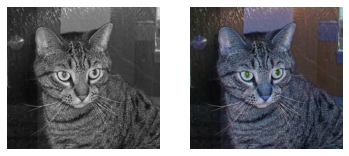

In [356]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# create directory path
PATH ="E:/kaggle_original_data/dogs-vs-cats-small/train/cats/cat.1.jpg"

# load image black and white
image = cv2.imread(PATH, cv2.IMREAD_GRAYSCALE)

# load colored image
image_colored = cv2.imread(PATH, cv2.IMREAD_COLOR)
#image_colored = cv2.cvtColor(image_colored, cv2.COLORBGR2RGB)

# show image
plt.figure()
plt.subplot(1,2,1)
plt.imshow(image, cmap = "gray")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(image_colored)
plt.axis('off')
plt.show()


#### Describing Image

In [357]:
print('Image Black and White shape: ', image.shape)
print('Image colored shape: ', image_colored.shape)

Image Black and White shape:  (280, 300)
Image colored shape:  (280, 300, 3)


#### Save Image

In [ ]:
cv2.imwrite(PATH, image)

#### Resizing Image: change its resolution

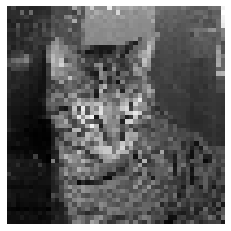

In [360]:
# load image
image = cv2.imread(PATH, cv2.IMREAD_GRAYSCALE)

# resize image
image_50x50 = cv2.resize(image, (50,50))

# view image
plt.imshow(image_50x50, cmap = 'gray')
plt.axis('off')
plt.show()

# note: resizing image is useful bc img need to be the 
# same size to use as inputs, and reduce memory usage

#### Cropping Image

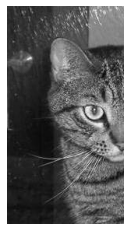

In [365]:
# load image
image = cv2.imread(PATH, cv2.IMREAD_GRAYSCALE)

# crop image
image_cropped = image[:, :150]

# show image
plt.imshow(image_cropped, cmap ='gray')
plt.axis('off')
plt.show()

#### Blurring Image 

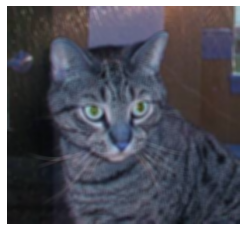

In [368]:
# load image
image = cv2.imread(PATH, cv2.IMREAD_COLOR)

# blur image
image_blur = cv2.blur(image, ksize = (5,5))

# view image
plt.imshow(image_blur)
plt.axis('off')
plt.show()

#### Applying Kernels: using matrice with dotproduct for image transformation. Create our own filter

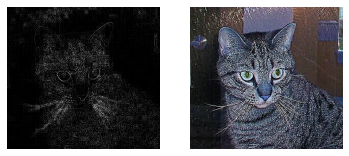

In [374]:
# create kernels
kernels = np.ones((5,5)) / 25
kernel_edge_detection = np.array([[0,1,0],
                                [1,-4,1],
                                [0,1,0]])
kernel_sharpen = np.array([[0,-1,0],
                          [-1,5,-1],
                          [0,-1,0]])

# apply kernel on image
image_edge = cv2.filter2D(image, -1, kernel_edge_detection)
image_sharpen = cv2.filter2D(image, -1, kernel_sharpen)

# view image
plt.figure()
plt.subplot(1,2,1)
plt.imshow(image_kernel, cmap = 'gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(image_sharpen, cmap = 'gray')
plt.axis('off')
plt.show()

#### Sharpening Images

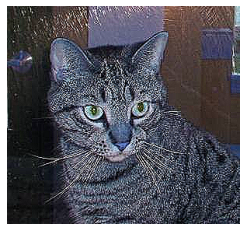

In [375]:
kernel_sharpen = np.array([[0,-1,0],
                          [-1,5,-1],
                          [0,-1,0]])

# apply kernel on image
image_sharpen = cv2.filter2D(image, -1, kernel_sharpen)

# view image
plt.imshow(image_sharpen, cmap = 'gray')
plt.axis('off')
plt.show()

#### Enhancing contrast for black and white image

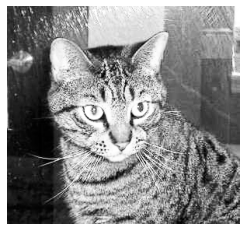

In [377]:
# load image
image = cv2.imread(PATH, cv2.IMREAD_GRAYSCALE)

# enhance image
image_enhanced = cv2.equalizeHist(image)

# view image
plt.imshow(image_enhanced, cmap ='gray')
plt.axis('off')
plt.show()

#### Enhancing contrast for colored image

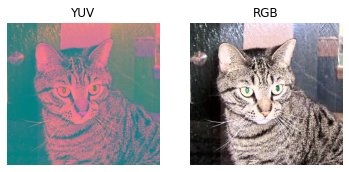

In [384]:
# load image
image_bgr = cv2.imread(PATH)

# Convert to YUV
image_yuv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2YUV)

# apply histogram equalization
image_yuv[:, :, 0] = cv2.equalizeHist(image_yuv[:,:,0])

# convert to rgb
image_rgb = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2RGB)

# show image
plt.figure()
plt.subplot(1,2,1)
plt.imshow(image_yuv)
plt.title('YUV')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(image_rgb)
plt.title('RGB')
plt.axis('off')
plt.show()

#### Isolating Colors: define range of colors and apply mask

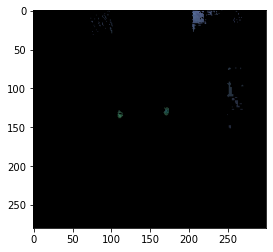

In [386]:
# load image
image_bgr= cv2.imread(PATH)

# convert BGR to HSV
image_hsv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2HSV)

# define range of blues values in hsv: hue, saturation, value
lower_blue = np.array([50,100,50])
upper_blue = np.array([130,255,255])

# create mask
mask = cv2.inRange(image_hsv, lower_blue, upper_blue)

# apply mask on image
image_bgr_masked = cv2.bitwise_and(image_bgr, image_bgr, mask=mask)

# convert bgr to rgb
image_rbg = cv2.cvtColor(image_bgr_masked, cv2.COLOR_BGR2RGB)

# show image
plt.imshow(image_rbg)
plt.show()

#### Binarizing Image: simplify image

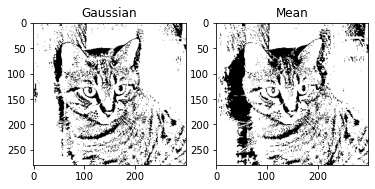

In [391]:
# load image
image_gray = cv2.imread(PATH, cv2.IMREAD_GRAYSCALE)

# binarize image: apply adaptiev treshold
max_output_value = 255
neighborhood_size = 99
substract_from_mean = 18
image_binarized_gauss = cv2.adaptiveThreshold(image_gray,
        max_output_value, 
        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        cv2.THRESH_BINARY,
        neighborhood_size,
        substract_from_mean)

image_binarized_mean = cv2.adaptiveThreshold(image_gray,
        max_output_value, 
        cv2.ADAPTIVE_THRESH_MEAN_C,
        cv2.THRESH_BINARY,
        neighborhood_size,
        substract_from_mean)

# show image
plt.figure()
plt.subplot(1,2,1)
plt.imshow(image_binarized_gauss, cmap = 'gray')
plt.title('Gaussian')

plt.subplot(1,2,2)
plt.imshow(image_binarized_mean, cmap = 'gray')
plt.title('Mean')
plt.show()

# adaptive_thresh_gaussian_c: weighted sum of neighbor
# alternative: adaptive_thresh_mean_c

#### Remove background: isolate foreground

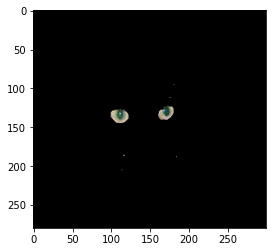

In [394]:
# load image and convert to RGB
image_bgr = cv2.imread(PATH)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# create rectangle: start x, start y, width, height
rectangle = (0,56,256,150)

# create temporary arrays used by grabCut
bgdModel = np.zeros((1,65), np.float64)
fgdModel = np.zeros((1,65), np.float64)

# run grabCut
cv2.grabCut(image_rgb, # our image
           mask, # the mask
           rectangle,  # the rectangle
           bgdModel, # background array
           fgdModel, # background array
           5, # nb iterations
           cv2.GC_INIT_WITH_RECT) # init using rect

# create second mask: sure and likely background 
# are set to 0, rest is 1
mask_2 = np.where((mask ==2) | (mask ==0), 0, 1).astype('uint8')

# multiply image with new mask to remove background
image_no_bg = image_rgb * mask_2[:,:, np.newaxis]

# show image
plt.imshow(image_no_bg)
plt.show()


#### Detecting Edge

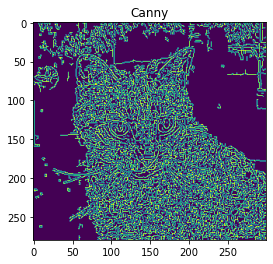

In [398]:
# load image
image = cv2.imread(PATH, cv2.IMREAD_GRAYSCALE)

# calculating median intensity
median_intensity = np.median(image)

# set threshold to be one std above and below median intensity
lower_threshold = int(max(0, (1 - 0.33) * median_intensity))
upper_threshold = int(min(255, (1 + 0.33) * median_intensity)) 

# apply Canny edge detector
image_canny =cv2.Canny(image, lower_threshold, upper_threshold)

# show image
plt.imshow(image_canny)
plt.title('Canny')
plt.show()

#### Detecting Corners with cornerHarris

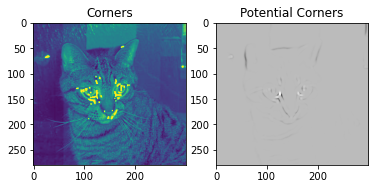

In [405]:
# load image as grayscale
image_bgr = cv2.imread(PATH)
image_gray = cv2.cvtColor(image_bgr,cv2.COLOR_BGR2GRAY)
image_gray = np.float32(image_gray)

# set corner detector parameters
block_size = 2
aperture = 29
free_parameter = 0.04

# Detect Corners
detector_responses = cv2.cornerHarris(image_gray,
                                     block_size,
                                     aperture, 
                                     free_parameter)
# large corner markers
detector_responses = cv2.dilate(detector_responses, None)

# Mark detectors response above threshold as white
threshold = 0.02
image_bgr[detector_responses > threshold *
         detector_responses.max()] = [255,255,255]

# convert to grayscale
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

# show image
plt.figure()
plt.subplot(1,2,1)
plt.imshow(image_gray)
plt.title('Corners')

plt.subplot(1,2,2)
plt.imshow(detector_responses, cmap='gray')
plt.title('Potential Corners')
plt.show()

#### Detecting Corners with goodFeaturesToTrack

#### Creating Features For Machine Learning

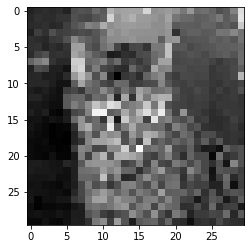

(900,)

In [410]:
# load image
image = cv2.imread(PATH, cv2.IMREAD_GRAYSCALE)

# Resize image to 10x10
image_10x10 = cv2.resize(image, (30,30))

# convert image to 1-D tensor
image_10x10.flatten()

# show image
plt.imshow(image_10x10, cmap ='gray')
plt.show()

# show shape
image_10x10.flatten().shape

# note: with color, we have 3x more features and it is harder
# to compute. We can solve this problem with dimension reduction


#### Encoding Mean Color as Feature

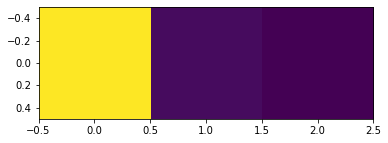

In [412]:
# load image
image_bgr = cv2.imread(PATH, cv2.IMREAD_COLOR)

# Calculate mean of each chanel
channels = cv2.mean(image_bgr)

# Swap blue and red values to make BGR to RGB
observations = np.array([(channels[2], channels[1], channels[0])])

# show image
plt.imshow(observations)
plt.show()

#### Encoding Histogram as features

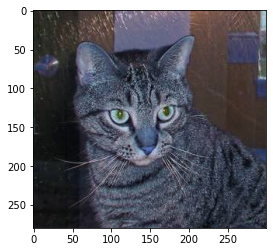

In [434]:
# load image 
image_bgr = cv2.imread(PATH, cv2.IMREAD_COLOR)

# convert bgr to rgb
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# create list for features
features = []

# initate each color channel
colors = ['r', 'g', 'b']

# calculate histogram for each channel
for i, channel in enumerate(colors):
    histogram = cv2.calcHist([image_rgb], # image
                            [i], # index
                            None, # no mask
                            [256], # histogram size
                            [0,256]) #range
    features.append(histogram)
    
# create vector for an observation's feature values
observation = np.array(features).flatten()

observation[0:5]

plt.imshow(image_bgr)
plt.show()

#### Combination of color chanel 

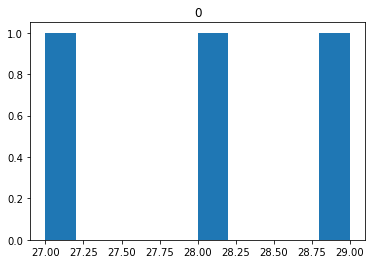

In [435]:
# get pixel
pixel = pd.DataFrame(image_bgr[120,5])

# show hist 
pixel.hist(grid=False)
plt.show()

#### Make calcHist for each color channel

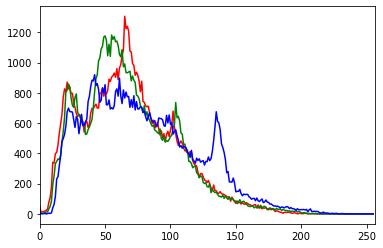

In [436]:
# init color
colors = ['r', 'g', 'b']

# calculate hist and make plot for each color channel
for i, channel in enumerate(colors):
    hist = cv2.calcHist([image_bgr],
                       [i],
                       None,
                       [256],
                       [0,256])
    plt.plot(hist, color = channel)
    plt.xlim([0,256])
    
plt.show()

## Chap 9: Dimensionality Reduction Using Feature Extraction 

#### Reducing Features Using Principal Components Analysis

In [440]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets

# load data
digits = datasets.load_digits()

# Standardize the feature matrix
features = StandardScaler().fit_transform(digits.data)

# Create PCA
pca = PCA(n_components = 0.95, whiten = True)

# fit PCA
features_pca = pca.fit_transform(features)

# Show results
print("original features numb:", features.shape[1])
print('pca on df', features_pca.shape[1])

# we use n_components between 0.95 and 0.99 to use 95% to 99% 
# of variance retained
# Whiten: make mean = 0 and unit variance
# svd_solver ='randomized' : stochastic algo

original features numb: 64
pca on df 40


#### Reducing Feature when Data is Linearly Inseparable using Kernel PCA

In [448]:
from sklearn.decomposition import KernelPCA
from sklearn.datasets import make_circles

# generate inseparable data
features, _ = make_circles(n_samples = 1000,
                          random_state = 420,
                          noise = 0.1,
                          factor = 0.1)

# create kernel pca
kernel_pca = KernelPCA(kernel = 'rbf', gamma =15, n_components = 1)

# reduce features
features_pca = kernel_pca.fit_transform(features)

# view
print('original data shape:', features.shape)
print('kernel pca :', features_pca.shape)

# note: pca tries to maximize variance

# we use rbf as kernel for gaussian radical basis function
# using kernel = 'linear' makes regular PCA
# n_components: choose the number of parameters
# gamma : kernel hyperparameters

original data shape: (1000, 2)
kernel pca : (1000, 1)


#### Reducing Featrues by Maximizing Class Separability with LDA

In [451]:
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# load data
iris = datasets.load_iris()
features = iris.data
target = iris.target

# create lda
lda = LinearDiscriminantAnalysis(n_components = 1)

# reduce features
features_lda = lda.fit(features, target).transform(features)

# view
print('original df : ', features.shape)
print('features lda: ', features_lda.shape)

# amount of variance explained by eacg component
lda.explained_variance_ratio_

# note: lda tries to maximize mean of clusters and minimize 
# variance for better separation. has additional goal than pca:mean


original df :  (150, 4)
features lda:  (150, 1)


array([0.9912126])

#### Reducing Features with non negative Matrix Factorization

In [452]:
from sklearn.decomposition import NMF
from sklearn import datasets

# load data
digits = datasets.load_digits()
features = digits.data

# create NMF
nmf = NMF(n_components = 10, random_state =420)

# reduce features
features_nmf = nmf.fit_transform(features)

# Show results
print("Original number of features:", features.shape[1])
print("Reduced number of features:", features_nmf.shape[1])

# unsupervised technique for linear dimensionality reduction
# breaks up data into latent variabels.
# values has to be positive to work

Original number of features: 64
Reduced number of features: 10


#### Reducing Features using Sparse Data using TSVD: only non nul elements

In [464]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
from sklearn import datasets
import numpy as np

# load data
digits = datasets.load_digits()

# standardize features
features_standardized = StandardScaler().fit_transform(digits.data)

# put features in sparse matrix
sparse_mat = csr_matrix(features_standardized)

# create TSVD
tsvd = TruncatedSVD(n_components = 10)

# apply tsvd on sparse mat
features_sparse_tsvd = tsvd.fit_transform(sparse_mat)

# Show results
print("features standardized:", features_standardized.shape[1])
print("sparse matrix features:", sparse_mat.shape[1])
print("Reduced number of features:", features_sparse_tsvd.shape[1])

# see data loss
tsvd.explained_variance_ratio_[:].sum()

features standardized: 64
sparse matrix features: 64
Reduced number of features: 10


0.5887245646379315

## Chap 10: Dimensionality Reduction Using Feature Selection 

#### Thresholding Numerical Feature Variance

In [466]:
from sklearn import datasets
from sklearn.feature_selection import VarianceThreshold

# load data
iris = datasets.load_iris()
features = iris.data
tragets= iris.target

# create thresholder
thresholder = VarianceThreshold(threshold = .5)

# create features matrix
feature_mat = thresholder.fit_transform(features)

# view mat
feature_mat[:3]

# view variance
thresholder.fit(features).variances_

# premisse: features with low variance are less interesting than 
# feature with high variance. formula: moyenne (value- mean) squared
# we can't use  standardizer because all values will be 1

array([[5.1, 1.4, 0.2],
       [4.9, 1.4, 0.2],
       [4.7, 1.3, 0.2]])

#### Thresholding with Binary Feature variacne:select subset of features with bernouilli random var above threshold

In [468]:
from sklearn.feature_selection import VarianceThreshold

# create features matrix
features = [[0, 1, 0],
 [0, 1, 1],
 [0, 1, 0],
 [0, 1, 1],
 [1, 0, 0]]

# create threshold
threshold = VarianceThreshold(threshold = .75 * (1 - .75))

# subset variables
threshold.fit_transform(features)

# we examine a ds variacne with bernouilli random var: p(1-p)

array([[0],
       [1],
       [0],
       [1],
       [0]])

#### Remove highly correlated features with correlatioin matrix

In [475]:
# create data with highly correlated values
features = np.array([[1, 1, 1],
 [2, 2, 0],
 [3, 3, 1],
 [4, 4, 0],
 [5, 5, 1],
 [6, 6, 0],
 [7, 7, 1],
 [8, 7, 0],
 [9, 7, 1]])

# convert features into matrix
df = pd.DataFrame(features)

# create correlation matrix
corr_matrix = df.corr().abs()

# determine variables to keep: upper triangle
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),
 k=1).astype(np.bool))

# find index of features to drop: remove feat above 95 of correlation
col_indices_to_drop = [column for column in upper.columns
                       if any(upper[column] > 0.95)]

# drop columns
df.drop(df.columns[col_indices_to_drop], axis =1). head()

## Note: we use corr() to view higl correlated variables,
# and remove all except one because the information we get
# is redundant 

,0,2
0,1,1
1,2,0
2,3,1
3,4,0
4,5,1


#### Remove Irrelevant Features for Classification with chi-square statistic and SelectKbest for categorical features

In [482]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.feature_selection import chi2, f_classif

# load data
iris = load_iris()
features = iris.data
targets = iris.target

# Convert categorical data in integer
features = features.astype(int)

### Select the best two features: Method with highest chi-square
# if values are categorical
chi2_selector = SelectKBest(chi2, k=2)
features_kbest = chi2_selector.fit_transform(features, targets)

### Select the best two features: Method with f_class (ANOVA) for
# values are quantitative
fvalue_selector = SelectKBest(f_classif, k=2)
features_kbest = fvalue_selector.fit_transform(features, targets)

# Select the best n features using percentiles
fvalue_selector = SelectPercentile(f_classif, percentile = 75)
features_kbest = fvalue_selector.fit_transform(features, targets)

# Show results
print("Original number of features:", features.shape[1])
print("Reduced number of features:", features_kbest.shape[1])

## Note: we want to remove uninformaive features. 
# we apply chi-square (X-squared) stat between each feature 
# and target vector to determine independance between nb of 
# obs and class
### if two variables are higly dependant, they are informative
# when training the model
### ANOVA with f_classif calculate mean for each class and tells
# if they are different
### Select Percentile is an alternative 


Original number of features: 4
Reduced number of features: 3


#### Remove Irrelevant Features for Classification with f_classif ANOVA and SelectPercentile for quantitative features

In [ ]:
# load data
iris = load_iris()
features = iris.data
targets = iris.target

# Convert categorical data in integer
features = features.astype(int)

### Select the best two features: Method with f_class (ANOVA) for
# values are quantitative
fvalue_selector = SelectKBest(f_classif, k=2)
features_kbest = fvalue_selector.fit_transform(features, targets)

# Select the best n features using percentiles
fvalue_selector = SelectPercentile(f_classif, percentile = 75)
features_kbest = fvalue_selector.fit_transform(features, targets)

# Show results
print("Original number of features:", features.shape[1])
print("Reduced number of features:", features_kbest.shape[1])


#### Recursively remove features with RFECV: recursive feature elimination with cross validation

In [485]:
import warnings
from sklearn.datasets import make_regression
from sklearn.feature_selection import RFECV
from sklearn import datasets, linear_model

# Suppress an annoying but harmless warning
warnings.filterwarnings(action="ignore", module="scipy",
 message="^internal gelsd")

# generate features matrix and target vector with make regression
features, target = make_regression( n_samples = 10000,
                                  n_features = 100,
                                  n_informative =2, 
                                  random_state = 420)

# create linear regression
lin_reg = linear_model.LinearRegression()

# recursively remove features
rfecv = RFECV(estimator = lin_reg, step = 1,
              scoring = 'neg_mean_squared_error')
rfecv.fit(features, target).transform(features)

### WE train a model and remove its worst feature until the
# model accuracy becomes worse

array([[ 0.39766312,  0.35157785],
       [-1.34432116, -0.16255151],
       [ 0.11539519, -0.91775481],
       ...,
       [-0.50487478, -0.07594816],
       [ 0.12172277,  1.98293771],
       [-0.04197372,  1.16751964]])

## Chap 11: Model Evaluation 

#### Crossvalidation: create pipeline to preprocess data, train model, and evaluate it using crossvalidation

In [499]:
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# load data
digits = datasets.load_digits()
features = digits.data
targets = digits.target

# split training and testing data
features_train, features_test, target_train, target_test = train_test_split(features, targets, test_size=0.1, random_state=1)

# create stardardizer
standardizer = StandardScaler()

# Fit standardizer to training set
standardizer.fit(features_train)

# Apply to both training and test sets
features_train_std = standardizer.transform(features_train)
features_test_std = standardizer.transform(features_test)

# create model
model = LogisticRegression()

# create k-Fols cross-validation
kf = KFold(n_splits =10, shuffle = True, random_state =420)

# create pipeline
pipeline = make_pipeline(standardizer, model)


# make crossvalidation
cv_results = cross_val_score(pipeline,
                            features, 
                            targets,
                            cv = kf, 
                            scoring = 'accuracy',
                            n_jobs =-1 ) # use all CPU


#### Create a baseline regression model to compare model with using DummyRegressor for regression

In [501]:
from sklearn.datasets import load_boston
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# load data
boston = load_boston()
features = boston.data
target = boston.target

# split training and testing data
features_train, features_test, target_train, target_test = \
    train_test_split(features, target, random_state = 420)
    
# create dummy regressor, fit and get R-square score
dummy = DummyRegressor(strategy = 'mean')
dummy.fit(features_train, target_train)
dummy_score = dummy.score(features_test, target_test)

# create model, fit and get R-square score
lin_reg = LinearRegression().fit(features_train, target_train)
lin_reg_score = lin_reg.score(features_test, target_test)

print('dummy R2 : ', dummy_score)
print('lin reg R2:', lin_reg_score)

# note: the more R-squared is close to 1, the more variacne is 
# explained by features

dummy R2 :  -0.0005163354383890262
lin reg R2: 0.8075265103858612


#### Create a baseline regression model to compare model with using DummyClassifier for classification

In [509]:
from sklearn import datasets
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# load data
iris = datasets.load_iris()
features = iris.data
targets= iris.target

# split train test set
features_train, features_test, targets_train, targets_test = \
train_test_split(features, targets, random_state =420)

# create dummy classifier
dummy = DummyClassifier(strategy = 'uniform', random_state =420) 
dummy.fit(features_train, targets_train)
dummy_score = dummy.score(features_test, targets_test)

# create model
random_forest = RandomForestClassifier().fit(
    features_train, targets_train)
random_forest_score = random_forest.score(features_test, targets_test)

# print
print('dummy R2 : ', dummy_score)
print('random forest R2:', random_forest_score)


dummy R2 :  0.34210526315789475
random forest R2: 1.0


#### Using accuracy with cross_val_score for binary classes

In [513]:

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# generate features mat and target
features, targets = make_classification(n_samples =10000,
                                       n_features = 3,
                                       n_informative =3,
                                       n_redundant =0,
                                       n_classes =2,
                                       random_state = 420)
# create model
model = LogisticRegression()

# measure model accuracy: (TP + TN) / (TP+TN+FP+FN)
cross_val_score(model, features, targets, scoring='accuracy')
# measure precision: TP/ (TP+FP)
cross_val_score(model, features, targets, scoring='precision')
# measure recall: TP / (TP+FN)
cross_val_score(model, features, targets, scoring='recall')
# measure f1: 2 x (precision x recall) / (precision + recall)
# balance between recall and precision
cross_val_score(model, features, targets, scoring='f1')

array([0.94612795, 0.95862069, 0.93952484, 0.93167028, 0.94086022])

#### Using accuracy with training and testing set

In [514]:
# with train ing and testing set
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# create train test ds
features_train, features_test, targets_train, targets_test = \
    train_test_split(features, targets, test_size = 0.1,
                     random_state = 420)

# predict values
model = LogisticRegression().fit(features_train, targets_train)
predictions = model.predict(features_test)

# get score
accuracy_score(targets_test, predictions)


0.902

#### Evaluating Multiclass Classifier Predictions for 3+ classes using cross_val_score

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# generate data
features, targets = make_classification(n_samples = 10000,
                                       n_classes = 3, 
                                       n_informative = 3,
                                       n_redundant = 0,
                                       random_state = 420)

# create model
model = LogisticRegression()

# Cross-validate model using macro averaged F1 score
cross_val_score(model, features, targets, scoring='f1_macro')
cross_val_score(model, features, targets, scoring='f1_micro')
cross_val_score(model, features, targets, scoring='f1_weighted')

#### Using Roc and AUC

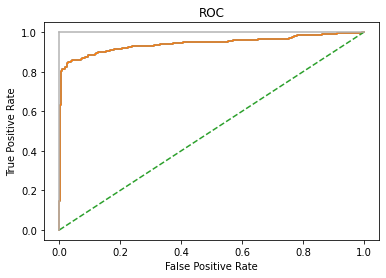

Threshold: 0.07194459250677938
True Positive Rate: 0.9644268774703557
False Positive Rate: 0.6538461538461539


0.9425037205357574

In [532]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

# generate data
features, targets = make_classification (n_samples = 10000,
                                        n_features =10,
                                        n_classes = 2,
                                        n_informative = 3,
                                        random_state = 420)

# split data into train and test set
features_train, features_test, targets_train, targets_test =\
    train_test_split(features, targets, test_size =0.1, 
                     random_state =420)

# make model
model = LogisticRegression().fit(features_train , targets_train)

# predict probabilities
predictions_prob = model.predict_proba(features_test)[:,1]

# create roc
false_positive_rate, true_positive_rate, threshold = \
    roc_curve(targets_test, predictions_prob)

# plot ROC curve
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

# view tradeoff
print("Threshold:", threshold[116])
print("True Positive Rate:", true_positive_rate[116])
print("False Positive Rate:", false_positive_rate[116])

# calculate auc
roc_auc_score(targets_test, predictions_prob)

# roc show bias variance tradeoff

#### VIsualize Classifier Performance with Confusion Matrix 

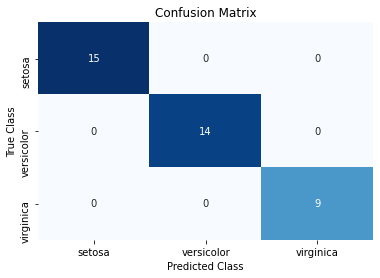

In [541]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd

# load data
iris = load_iris()
features = iris.data
targets = iris.target

# get target classes names
target_class_names = iris.target_names

# split train and test set
features_train, features_test, targets_train, targets_test = \
    train_test_split(features, targets, random_state = 420)

# Create model
classifier = LogisticRegression().fit(features_train, targets_train)

# get predictions
predictions = classifier.predict(features_test)

# create confusion matrix
confusion_mat = confusion_matrix(targets_test, predictions)
confusion_mat = pd.DataFrame(confusion_mat,
                             index = target_class_names,
                            columns = target_class_names)

# plot confusion matrix as heat map
sns.heatmap(confusion_mat, annot=True, cbar=None, cmap='Blues')
plt.title("Confusion Matrix")
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

# confusion matrices are easy to interpret and we can see what 
# classes it has difficulty to predict so we can optimize 

#### Evaluating Regression Models using MSE

In [546]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# generate values
features, targets = make_regression(n_samples = 1000,
                                   n_features = 3,
                                   n_informative = 3,
                                   random_state = 420,
                                   coef = False,
                                   noise = 50,
                                   n_targets = 1)

# make model
lin_reg = LinearRegression()

# view score
cross_val_score(lin_reg, features, targets, 
                scoring = 'neg_mean_squared_error')
cross_val_score(lin_reg, features, targets, scoring = 'r2') # rsquared



array([0.79593536, 0.83818649, 0.79793638, 0.79916458, 0.80929937])

#### Evaluating Clustering Models with silouhette_score

In [549]:
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# generate data
features, _ = make_blobs(n_samples = 1000,
                        n_features = 10,
                        centers = 2,
                        cluster_std = 0.5,
                        shuffle = True,
                        random_state =1)

# cluster data
cluster = KMeans(n_clusters =2 , random_state =420) \
    .fit(features)

# get predicted classes
target_predicted = cluster.labels_

# evaluate model 
silhouette_score(features, target_predicted)


0.8916265564072142

#### Create Custom Evaluation Metric

In [559]:
from sklearn.metrics import make_scorer, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.datasets import make_regression

# generate data
features, targets = make_regression(n_samples =1000,
                                   n_features = 3,
                                   random_state = 420)

# split into train and test
features_train, features_test, targets_train, targets_test =\
    train_test_split(features, targets, random_state = 420,
                    test_size = 0.1)


# create custom metrics
def custom_metric(target_test, target_predicted):
    # calculate r squared
    return r2_score(target_test, target_predicted)
    
# define score
cust_score = make_scorer(custom_metric, greater_is_better= True)

# create model
model = Ridge().fit(features_train, targets_train)

# make predictions
predictions = model.predict(features_test)

# apply custom score 
cust_score(model, features_test, targets_test)

0.9999987100532746

#### Visualize the Learning Curve

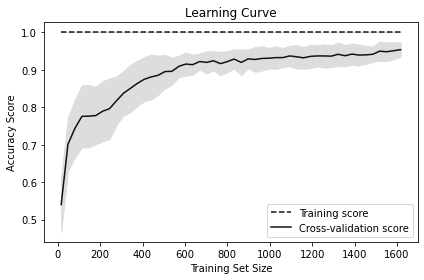

In [563]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve

# load data
digits = load_digits()
features =digits.data
targets = digits.target

# create learning curve
train_sizes, train_scores, test_scores = \
    learning_curve(RandomForestClassifier(),
                  features, 
                  targets, 
                  cv=10,
                  scoring = 'accuracy',
                  n_jobs = -1,
                  train_sizes=np.linspace(0.01,1.0,50))

# get mean and std
train_mean = np.mean(train_scores, axis= 1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis =1)

# create plot
plt.plot(train_sizes, train_mean, '--', color="#111111",
         label="Training score")
plt.plot(train_sizes, test_mean, color="#111111",
         label="Cross-validation score")
plt.fill_between(train_sizes, train_mean - train_std,
 train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std,
 test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"),
plt.legend(loc="best")
plt.tight_layout()
plt.show()

#### Create Text Report of evaluation metrics with classficiation_report

In [574]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# load data
iris = datasets.load_iris()
features = iris.data
targets= iris.target

# get target class names
target_class_names  = iris.target_names

# split into train and test
features_train, features_test, targets_train, targets_test =\
    train_test_split(features, targets, random_state = 420)

# create model
model = LogisticRegression().fit(features_train, 
                                      targets_train)

# preditc
predictions = model.predict(features_test)


# make classification report
print(classification_report(targets_test, predictions, 
                     target_names = target_class_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      1.00      1.00        14
   virginica       1.00      1.00      1.00         9

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



#### Visualize effect of Hyperparameter Values: understanding how model performance change with different hyperparameters


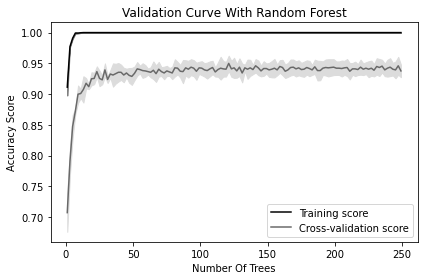

In [580]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve

# load data 
digits = load_digits()
features = digits.data
targets = digits.target

# create range of values for hyperparameters
param_range = np.arange(1, 250,2) # generate all values by 2

# calculate accuracy on training and test using different param
train_scores, test_scores = validation_curve(
    RandomForestClassifier(),
    features,
    targets, 
    param_name = 'n_estimators',
    param_range = param_range,
    cv=3,
    scoring = 'accuracy',
    n_jobs=-1)

# Calculate mean and standard deviation 
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")
# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std,
 train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std,
 test_mean + test_std, color="gainsboro")
# Create plot
plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

## Chap 12: Model Selection

#### Select Best Models Using Exhaustive Search: GridSearchCV

In [583]:
import numpy as np
from sklearn import linear_model, datasets
from sklearn.model_selection import GridSearchCV

# load data
iris = datasets.load_iris()
features = iris.data
targets = iris.target

# create model
model = linear_model.LogisticRegression()

# create potential penalty hyperparameters values
penalty = ['l1', 'l2']

# create potential regularization hyperparameters values
c = np.logspace(0,4,10)

# create hyperparameters dictionnary
hyperparameters = dict(C = c, penalty = penalty)

# create gridSearch
grid_search = GridSearchCV(model, hyperparameters,
                           verbose= 0)


# fit grid search 
best_model = grid_search.fit(features, targets)

# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

# predict value using best model
predictions = best_model.predict(features)

# brute force approach by testing all possible values

c:\users\emuli\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
c:\users\emuli\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\emuli\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_select

c:\users\emuli\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\emuli\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
c:\users\emuli\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model

c:\users\emuli\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\emuli\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

Best Penalty: l2
Best C: 7.742636826811269


c:\users\emuli\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#### Select Best Models Using Randomized Search: RandomizedSearchCV

In [589]:
from scipy.stats import uniform
from sklearn import linear_model, datasets
from sklearn.model_selection import RandomizedSearchCV

# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target

# Create logistic regression
logistic = linear_model.LogisticRegression()

# Create range of candidate regularization penalty hyperparameter values
penalty = ['l1', 'l2']

# create distibution of canadidates
C = uniform(loc=0, scale =4)

# create hyperparamters options
hyperparameters = dict(C=C, penalty=penalty)

# create randomized search
randomized_search = RandomizedSearchCV(
    logistic, hyperparameters, 
    random_state = 420, n_iter=100, verbose=0
)

# fit randomized search
best_model = randomized_search.fit(features, target)

c:\users\emuli\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
c:\users\emuli\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\emuli\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model

c:\users\emuli\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\emuli\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

c:\users\emuli\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\emuli\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

c:\users\emuli\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\emuli\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

c:\users\emuli\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\emuli\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

c:\users\emuli\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\emuli\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

c:\users\emuli\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\emuli\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

c:\users\emuli\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\emuli\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

c:\users\emuli\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\emuli\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

c:\users\emuli\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\emuli\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

c:\users\emuli\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
c:\users\emuli\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\emuli\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model

c:\users\emuli\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\emuli\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

#### Selecting Best Models from Multiple Learning Algorithms

####  Selecting Best Models When Preprocessing

#### Speeding Up Model Selection Using AlgorithmSpecific Methods

####  Evaluating Performance After Model Selection

## Chap 13: Linear Regression

#### Fitting a Line

In [592]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

# Load data with only two features
boston = load_boston()
features = boston.data[:,0:2]
target = boston.target

# create linear reg
model = LinearRegression()

# Fit the linear regression
model.fit(features, target)

# view model parameters
model.intercept_
model.coef_

# predict values
model.predict(features)[0]*1000

24573.366631705547

#### Handling Interactive effects



In [593]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.preprocessing import PolynomialFeatures

# load data
boston = load_boston()
features = boston.data[:,:2]
target = boston.target

# create interaction
interaction = PolynomialFeatures(
        degree = 3, include_bias = False, interaction_only= True)
features_interaction = interaction.fit_transform(features)

# create model
model = LinearRegression()

# fit model
model.fit(features_interaction, target)

# view feature interaction
features_interaction[0]

# we use feature interaction to minimize the effect of correlated
# variables

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Fitting a Nonlinear Relationship

In [594]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.preprocessing import PolynomialFeatures

# Load data with one feature
boston = load_boston()
features = boston.data[:,0:1]
target = boston.target

# create polynomial features
polynomial = PolynomialFeatures(degree = 3, include_bias  = False)
features_polynomial = polynomial.fit_transform(features)

# create model
lin_reg = LinearRegression()

# fit model
lin_reg.fit(features_polynomial, target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Reducing Variance with Regularization 

In [596]:
from sklearn.linear_model import Ridge
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler

# Load data
boston = load_boston()
features = boston.data
target = boston.target

# Stadardize data
standardizer = StandardScaler()
features_standardized = standardizer.fit_transform(features)

# create and fit model
model = Ridge(alpha=0.5).fit(features_standardized, target)

In [598]:
from sklearn.linear_model import RidgeCV
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler

# load data
boston = load_boston()
features = boston.data
target = boston.target

# standardize features
features_standardized = StandardScaler().fit_transform(features)

# fit model
ridge_cv = RidgeCV(alphas=[0.1,1,10]).fit(
    features_standardized, target)

# view parameters
ridge_cv.coef_
ridge_cv.alpha_

# we use crossvalidation to find the best values for alpha

1.0

#### Reducing Features with Lasso Regression 

In [600]:
from sklearn.linear_model import LassoCV
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler

# load data
boston = load_boston()
features = boston.data
targets = boston.target

# standardize features
features_standardized = StandardScaler().fit_transform(features)

# create model
model = LassoCV(alphas= [0.1,1,10]).fit(features_standardized,
                                      targets)

# evaluate
# predict


## Chap 14: Trees and Forests

#### Training a Decision Tree Classifier 

In [604]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

# load data
iris = load_iris()
features = iris.data
target = iris.target

# create decision tree classifier
decision_tree = DecisionTreeClassifier(random_state = 0, 
                                      criterion = 'entropy') \
    .fit(features, target)

# make prediction
decision_tree.predict([[2,3,4,5]])
decision_tree.predict_proba([[2,3,4,5]])

# decision trees use gini or entropy impurity to determine
# the best threshold

array([[0., 0., 1.]])

#### Train a Decision Tree Regressor 

In [610]:
from sklearn.datasets import load_boston
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler

# load data
boston = datasets.load_boston()
features = boston.data
target = boston.target

# standardize features
features_standardized = StandardScaler().fit_transform(features)

# create tree
tree = DecisionTreeRegressor(random_state =420, criterion ='mse') 
tree.fit(features_standardized, target)
    
# regression tree use MSE or MAE

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=420, splitter='best')

#### Visualizing Decision Tree Model

In [621]:
import pydotplus
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image
from sklearn import tree

# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target

# create decision tree
decision_tree = DecisionTreeClassifier(random_state = 420, criterion = 'gini')
decision_tree.fit(features, target)

# create dot data
dot_data = tree.export_graphviz(decision_tree, 
                               out_file = None, 
                               feature_names = iris.feature_names,
                               class_names = iris.target_names)

# draw graph
graph = pydotplus.graph_from_dot_data(dot_data)
# Image(graph.create_png())

# save graph
# graph.write_png('iris_tree.png')

#### Training a Random Forest Classifier

In [622]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets

# load data
iris = datasets.load_iris()
features = iris.data
target = iris.target

# create random forest
randomforest = RandomForestClassifier(random_state =0,
            n_jobs = -1, criterion = 'entropy')
randomforest.fit(features, target)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

#### Training RandomForest Regressor 

In [623]:
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

# load data
boston = datasets.load_boston()
features = boston.data
target = boston.target

# standardize features
features_standardized = StandardScaler().fit_transform(features)

# create random forest
randomforest = RandomForestRegressor(random_state =0,
                                     n_jobs =- 1,
                                    criterion = 'mse')
randomforest.fit(features_standardized, target)
# 

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

#### Identifying Important Feature in Random Forests 

<BarContainer object of 4 artists>

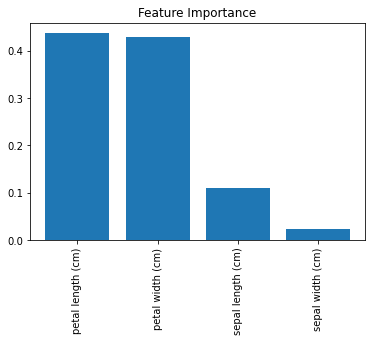

In [630]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

# load data
iris = load_iris()
features = iris.data
target = iris.target

# create random forest
randomforest = RandomForestClassifier(
    random_state =420, n_jobs =-1, criterion = 'gini')
randomforest.fit(features, target)

# calculate feature importances and sort 
importances = randomforest.feature_importances_
indices = np.argsort(importances)[::-1]

# rearrange names
names = [iris.feature_names[i] for i in indices]

# create plot
plt.figure()
plt.title('Feature Importance')
plt.xticks(range(features.shape[1]), names, rotation=90)
plt.bar(range(features.shape[1]), importances[indices])
plt.show()

#### Selecting Important Features in Random Forest 

In [631]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel

# load data
iris = datasets.load_iris()
features = iris.data
target = iris.target

# create random forest
randomforest = RandomForestClassifier(
    random_state = 420, n_jobs=-1, criterion = 'entropy')

# create selector: select feature greater than threshold
selector = SelectFromModel(randomforest, threshold = 0.3)

# get most important features
features_important = selector.fit_transform(features, target)

# create model
model= randomforest.fit(features_important, target)

#### Handling Imbalanced Classes 

In [632]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets

# load data
iris = datasets.load_iris()
features = iris.data
target = iris.target

# Make class highly imbalanced by removing first 40 observations
features = features[40:,:]
target = target[40:]

# create balanced random forest
randomforest = RandomForestClassifier(
    criterion = 'gini', random_state = 420,
    class_weight = 'balanced', n_jobs = -1
)

randomforest.fit(features, target)

# imbalanced classes reduce the performance of the model bc it
# is biased toward the classes with more observations

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=420, verbose=0,
                       warm_start=False)

#### Controling Tree Size : decisde tree size manually

In [634]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets

# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target

# create decision tree
decisiontree = DecisionTreeClassifier(
    random_state =420,
    max_depth = None,
    min_samples_split=2,
    min_samples_leaf =1,
    min_weight_fraction_leaf =0,
    max_leaf_nodes =None, 
    min_impurity_decrease=0
)

decisiontree.fit(features, target)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0, presort='deprecated',
                       random_state=420, splitter='best')

#### Imporve Performance through boosting 

In [636]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_iris

# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target

# create adaboost
adaboost = AdaBoostClassifier(
    random_state=0)
adaboost.fit(features, target)

# learning_rate, n_estimators, loss

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=0)

#### Evaluating Random Forest with Out-of-bags errors 

In [637]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target

# create random forest
randomforest = RandomForestClassifier(
    random_state=0, n_estimators = 1000,
    oob_score = True, n_jobs =-1
)
randomforest.fit(features, target)

# view oob errors
randomforest.oob_score_

# the oobs errors: we evaluate the tree using observation left out
# during trainign

0.9533333333333334

## Chap 15: K-Nearest Neighbors 

#### Finding an Observation Nearest Neighbors

In [650]:
from sklearn.datasets import load_iris
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

# load data
iris = datasets.load_iris()
features = iris.data
standardizer = StandardScaler()

# standardize features
features_standardized = standardizer.fit_transform(features)

# two nearest neighbors
nearest_neighbors = NearestNeighbors(n_neighbors = 2, 
                                    metric = 'euclidean')
nearest_neighbors.fit(features_standardized)

# Create an observation
new_observation = [ 1, 1, 1, 1]

# predict 
distances, indices = nearest_neighbors.kneighbors([new_observation])

# View distance to its nearest neighbors (vectors)
features_standardized[indices]

# view observation nearest neighbors (calculated)
distances

# list of nearest neighbors
nearest_neighbors_with_self = nearest_neighbors.kneighbors_graph(
    features_standardized).toarray()

# metric: euclidean, manhattan, minkowski

#### Creating K-Nearest Neighbor Classifier

In [651]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target

# standardize features
features_standardized = StandardScaler().fit_transform(features)

# Train KNN
knn = KNeighborsClassifier(n_neighbors = 5, n_jobs=-1,
                           metric = 'manhattan')
knn.fit(features_standardized, target)

# Create two observations
new_observations = [[ 0.75, 0.75, 0.75, 0.75],
 [ 1, 1, 1, 1]]

# Predict the class of two observations
knn.predict(new_observations)
knn.predict_proba(new_observations)

array([[0. , 0.6, 0.4],
       [0. , 0. , 1. ]])

#### Identifying the Best Neighborhood Size: the best value for K


In [646]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV

# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target

# Standardize features
features_standardized = standardizer.fit_transform(features)

# create KNN classifier
knn = KNeighborsClassifier(n_neighbors =5, n_jobs =-1)

# create pipeline
pipeline = Pipeline([('standardizer', standardizer), ('knn', knn)])

# Create space of candidate values
search_space = [{"knn__n_neighbors": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}]

# Create grid search
classifier = GridSearchCV(
 pipeline, search_space, cv=5, verbose=0).fit(
    features_standardized, target)

# Best neighborhood size (k)
classifier.best_estimator_.get_params()["knn__n_neighbors"]

#### Creating Radius-Based Nearest Neighbor Classifier

In [654]:
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# load data
iris = load_iris()
features = iris.data
targets = iris.target

# standardize features
features_standardized = StandardScaler().fit_transform(features)

# create radius based nn
radius_nn = RadiusNeighborsClassifier(radius = .5, n_jobs=-1)
radius_nn.fit(features_standardized, target)

# generate new observations
new_obs = [[1,1,1,1]]

# predict new observation class
radius_nn.predict(new_obs)



array([2])

## Chap 16: Logistic Regression 

#### Training Binary Classifier : only two classes

In [659]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# load data
iris = load_iris()
features = iris.data [:100, :]
targets = iris.target [:100]

# standardize features
features_standardized = StandardScaler().fit_transform(features)

# create logistic reg
logistic_reg = LogisticRegression(random_state = 420). \
    fit(features_standardized, targets)

# Create new observation
new_observation = [[.5, .5, .5, .5]]

# predict values
logistic_reg.predict(new_observation)  
logistic_reg.predict_proba(new_observation)

array([[0.17738424, 0.82261576]])

#### Training Multiclass Classifier

In [657]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# load data
iris = load_iris()
features = iris.data
targets = iris.target

# standardize features
features_standardized = StandardScaler().fit_transform(features)

# create logistic reg
logistic_reg = LogisticRegression(random_state = 420, 
                                 multi_class = 'ovr'). \
    fit(features_standardized, targets)

# Create new observation
new_observation = [[.5, .5, .5, .5]]

# predict values
logistic_reg.predict(new_observation)  
logistic_reg.predict_proba(new_observation)

# with multiclass logisitc regression, we add the parameter
# multi_class = 'ovr' : one-vs-rest

array([[0.0387617 , 0.40669108, 0.55454723]])

#### Reducing Variance Through Regularization 

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# load data
iris = load_iris()
features = iris.data
targets = iris.target

# standardize features
features_standardized = StandardScaler().fit_transform(features)

# Create logistic regression with regularization parameter
logistic_reg = LogisticRegressionCV(penalty='l2', Cs = 10, 
                                   random_state = 0, n_jobs =-1)
logistic_reg.fit(features_standardized, targets)

# We add a regularition parmater: l1 or l2 with a hyperparameter
# of its own:Cs. There is no way to optimize the Cs parameters

#### Training Classifier a Very Large Data

In [662]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# load data
iris = load_iris()
features = iris.data
targets = iris.target

# standardize features
features_standardized = StandardScaler().fit_transform(features)

# create logistic regression
logistic_regression = LogisticRegression(random_state = 420,
                                        solver = 'sag', 
                                        multi_class = 'ovr')
logistic_regression.fit(features_standardized, targets)



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=420, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

#### Handling Imbalanced Classes

In [667]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# load data 
iris = load_iris()
features = iris.data
target = iris.target

# Make class highly imbalanced by removing first 40 observations
features = features[40:,:]
target = target[40:]

# create target vector for each class
target = np.where((target == 0), 0, 1)

# standardize features
features_standardized = StandardScaler().fit_transform(features)

# Create Logistic Regression
logistic_regression = LogisticRegression(random_state = 0, 
                                        class_weight = 'balanced')
logistic_regression.fit(features_standardized, target)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Chap 17:Support Vector Machines

#### Training a Linear Classifier

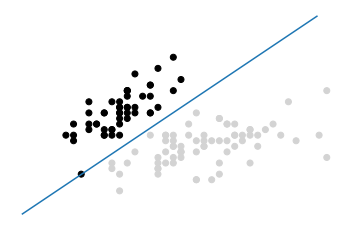

array([0])

In [674]:
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# load data
iris = load_iris()
features = iris.data[:120, :2]
target = iris.target[:120]

# standardize data
features_standardized = StandardScaler().fit_transform(features)

# create SVC
svc= LinearSVC(C=1.0).fit(features_standardized, target)

# # Plot data points and color using their class
color = ["black" if c == 0 else "lightgrey" for c in target]
plt.scatter(features_standardized[:,0], features_standardized[:,1], c=color)

# Create the hyperplane
w = svc.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2.5, 2.5)
yy = a * xx - (svc.intercept_[0]) / w[1]

# Plot the hyperplane
plt.plot(xx, yy)
plt.axis("off"), plt.show();

# create new observation
new_observation = [[ -2, 3]]

# Predict class of new observation
svc.predict(new_observation)

#### Handling Linearly Inseparable Classes Using Kernels

c:\users\emuli\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:30: UserWarning: No contour levels were found within the data range.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


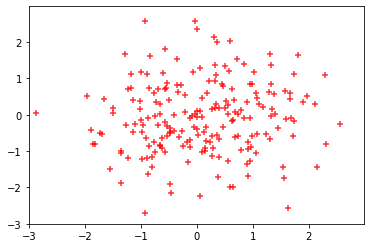

In [681]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# set seed
np.random.seed(420)

# Generate two features
features = np.random.randn(200,2)

# generate xor gate fro linearly inseperable classes
target_xor = np.logical_xor(features[:,0] > 0, 
                            features[:,1]> 0 )
target = np.where(target_xor, 0, 1)

# create svc
svc = SVC(kernel ='rbf', random_state = 420, gamma =1, C=1)
svc.fit(features, target)

# plot the SVM
def plot_decision_regions(features, target, classifier):
    cmap = ListedColormap('red', 'blue')
    xx1, xx2 = np.meshgrid(np.arange(-3, 3, 0.02),
                          np.arange(-3,3,0.02))
    Z = classifier.predict(np.array([xx1.ravel(),
                                    xx2.ravel()]).T)
    Z= Z.reshape(xx1.shape)
    plt.contour(xx1,xx2, Z, alpha = 0.1, cmap=cmap)
    
    for idx, cl in enumerate(np.unique(target)):
        plt.scatter(x=features[target ==cl, 0],
                    y=features[target ==cl, 1],
                   alpha =0.8, c=cmap(idx),
                   marker='+', label = cl)
        
plot_decision_regions(features, target, classifier = svc)
plt.show()

#### Creating Predicted Probabilities

In [687]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# load data 
iris = datasets.load_iris()
features = iris.data
target = iris.target

# Standardize features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# create svc
svc = SVC(kernel = 'linear', probability =True, random_state =0)
svc.fit(features, target)

# predict 
new_observation = [[.4 ,.4,.4 ,.4]]
svc.predict(new_observation)
svc.predict_proba(new_observation)

# to generate the model probability, we must set it true

array([[0.94509124, 0.04574674, 0.00916202]])

#### Identifying Support Vectors

In [689]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# load data 
iris = load_iris()
features = iris.data
target =iris.target

# standardize features
features_standardized = StandardScaler().fit_transform(features)

# create svc
svc =SVC(kernel='linear', random_state =0)
svc.fit(features_standardized, target)

# view support vectors
svc.support_vectors_
svc.support_

array([ 23,  41,  52,  54,  56,  57,  66,  68,  70,  72,  76,  77,  78,
        83,  84,  87,  98, 106, 110, 119, 123, 126, 127, 129, 133, 134,
       137, 138, 149])

#### Handling Imbalanced Classes 

In [691]:
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# load dataset imbalanced
iris = load_iris()
features = iris.data [40:100,:]
target = iris.target [40:100]

# create target vector
target = np.where((target == 0),0,1)

# scale features
features_standardized = StandardScaler().fit_transform(features)

# create svc
svc = SVC(kernel = 'linear', class_weight = 'balanced', C =1, 
         random_state =0)
svc.fit(features_standardized, target)


SVC(C=1, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

## Chap 18: Naive Bayes

#### Training a Classifier for Continuous Features: use Gaussian Naive Bayes

In [696]:
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

# load data
iris = datasets.load_iris()
features = iris.data
target = iris.target

# standardize data
features_standardized = StandardScaler().fit_transform(features)

# create gaussian naie bayes
classifier = GaussianNB(priors = [0.25, .25, .5]) 
classifier.fit(features_standardized, target)

# predict new values
new_obs = [[4,4,4,.4]]
classifier.predict(new_obs)

# priors: set probabilities of each class

array([[0.00000000e+00, 8.66468865e-30, 1.00000000e+00]])

####  Training a Classifier for Discrete and Count Features

In [700]:
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

# generetae text
text_data = np.array(['bobob', 'mammamama', 'duddodd'])

# target
target = np.array([0,0,1])

# create bags-of-words
bags = CountVectorizer().fit_transform(text_data).toarray()

# create naive bayes
classifier = MultinomialNB(class_prior = [0.25,.5])
classifier.fit(bags, target)

# predict new observation
new_observation = [[0, 0, 1]]
classifier.predict(new_observation)

# if class_prior is not specified, prior probabilites are learned
# using the data. If we have a uniform distribution, we can set
# fit_prior = False
# we can also smooth the model using alpha = 2


array([1])

#### Training a Naive Bayes Classifier for Binary Features: Bernouilli naive bayes classifier

In [705]:
import numpy as np
from sklearn.naive_bayes import BernoulliNB

# generate features
features = np.random.randint(2, size = (100,3))

# generate target
target = np.random.randint(2, size = (100,1)).ravel()

# create classifier
classifier = BernoulliNB(class_prior = [.25,.5])
classifier.fit(features, target)

# more param: class_prior = None, fit_prior = True

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=[0.25, 0.5], fit_prior=True)

#### Calibrating Predicted Probabilities: use signomoid to make values probabilities

In [708]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.calibration import CalibratedClassifierCV
from sklearn.preprocessing import StandardScaler

# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target

# standardize features
features_standardized = StandardScaler().fit_transform(features)

# create classifier
classifier_sigmoid = CalibratedClassifierCV(
    GaussianNB(), cv=2, method = 'sigmoid'
).fit(features_standardized, target)

# predict 
new_observation = [[ 2.6, 2.6, 2.6, 0.4]]
classifier_sigmoid.predict_proba(new_observation)


array([[0.0195019 , 0.04473133, 0.93576677]])

## Chap 19: Clustering

#### Clustering Using K-Means

In [718]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load data
iris = datasets.load_iris()
features = iris.data

# Standardize features
scaler = StandardScaler()
features_std = scaler.fit_transform(features)

# create cluster
cluster = KMeans(n_clusters =3, random_state = 0, n_jobs =-1)
cluster.fit(features)

# predict class
cluster.labels_

# view true class
iris.target

# Predict observation's cluster
new_observation = [[0.8, 0.8, 0.8, 0.8]]
cluster.predict(new_observation)

# View cluster centers
cluster.cluster_centers_

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

#### Speeding Up K-Means Clustering

In [714]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# load data
iris = datasets.load_iris()
features = iris.data

# standardize features
scaler = StandardScaler()
features_std = scaler.fit_transform(features)

# create model
cluster =MiniBatchKMeans(n_clusters =3, random_state =0,
                         batch_size = 100)
cluster.fit(features_std)

# batch_size: number if observation each batch

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=3, n_init=3, random_state=0, reassignment_ratio=0.01,
                tol=0.0, verbose=0)

#### Clustering Using Meanshift: no need to set the number of clusters prior

In [715]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MeanShift

# Load data
iris = datasets.load_iris()
features = iris.data

# Standardize features
scaler = StandardScaler()
features_std = scaler.fit_transform(features)

# Create meanshift object
cluster = MeanShift(n_jobs=-1)
model = cluster.fit(features_std)

# band_width: radius of area ie kernel. estimated auto
# cluster_all=false: do not cluster outliers

#### Clustering Using DBSCAN

In [716]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# load data
iris = load_iris()
features = iris.data

# standardize features
features_std = StandardScaler().fit_transform(features)

# create cluster
dbscan = DBSCAN(n_jobs=-1, metric = 'euclidean')
dbscan.fit(features_std)

dbscan.labels_ # outliers: -1

# eps: max distance from an observation to be considered its neighbor
# min_samples: number of observation in a cluster

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1, -1, -1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,
        1,  1,  1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
       -1,  1,  1, -1,  1,  1, -1,  1,  1,  1, -1, -1, -1,  1,  1,  1, -1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1],
      dtype=int64)

#### Clustering Using Hierarchical Merging

In [717]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

# Load data
iris = datasets.load_iris()
features = iris.data

# Standardize features
scaler = StandardScaler()
features_std = scaler.fit_transform(features)

# Create meanshift object
cluster = AgglomerativeClustering(n_clusters=3,
                                 linkage = 'ward',
                                 affinity = 'minkowski')

# Train model
model = cluster.fit(features_std)

# all observation start as their own cluster and are merged 
# together based on some criterias
# linkage: - ward: variance ; - average: average distance btw obs
# -complete: max distance btw obs
# affinity: distance used: euclidean, mikoski, manhattan

## Chap 20: Neural Networks

#### Preprocessing Data for Neural Networks

In [ ]:
# we use a standard scaler

#### Designing a Neural Network

In [726]:
from keras.models import Sequential
from keras.layers import Dense

# create model: structure + define functions with compile
ff_neural_network = Sequential([
    Dense(units = 16, activation = 'relu', input_shape=(10,)),
    Dense(units =16, activation = 'relu'),
    Dense(units =1, activation = 'sigmoid')   
])

ff_neural_network.compile(optimizer = 'rmsprop',
                         loss = 'binary_crossentropy',
                         metrics = ['accuracy'])

# activation function: - binary_crossentropy
#                      - categorical_crossentropy 
#                      - mse

#### Training a Binary Classifier

In [727]:
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense

# set seed
np.random.seed(420)

# set number of features
nb_features = 1000

# load data in trainig and testing set
(train_data, train_target), (test_data, test_target) = \
    imdb.load_data(num_words = nb_features)

# convert features into one hot encoder
tokenizer = Tokenizer(num_words = nb_features)
train_data = tokenizer.sequences_to_matrix(train_data, 
                                           mode = 'binary')
test_data = tokenizer.sequences_to_matrix(test_data,
                                          mode ='binary')

# create neural network
model = Sequential([    
    Dense(units = 16, activation = 'relu', input_shape=(nb_features,)),
    Dense(units = 16, activation = 'relu'),
    Dense(units = 1, activation = 'sigmoid')
])

model.compile(loss = 'binary_crossentropy',
             optimizer = 'rmsprop',
             metrics = ['accuracy'])



# fit model
history = model.fit(train_data, train_target, epochs =3, 
                   verbose = 1, batch_size = 100,
                   validation_data = (test_data, test_target))

Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 3s 132us/step - loss: 0.4133 - accuracy: 0.8190 - val_loss: 0.3335 - val_accuracy: 0.8583
Epoch 2/3
25000/25000 [==============================] - 1s 43us/step - loss: 0.3249 - accuracy: 0.8656 - val_loss: 0.3339 - val_accuracy: 0.8582
Epoch 3/3
25000/25000 [==============================] - 1s 42us/step - loss: 0.3166 - accuracy: 0.8679 - val_loss: 0.3291 - val_accuracy: 0.8603


#### Training a Multiclass Classifier


In [833]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.preprocessing.text import Tokenizer
from keras.utils.np_utils import to_categorical
from keras.datasets import reuters

# set seed
np.random.seed(420)

# set nb features
nb_features = 5000

# load data into train and test
(train_data, train_target), (test_data, test_target) = \
    reuters.load_data(num_words =nb_features)

# convert data into one hot encoder
tokenizer = Tokenizer(num_words =nb_features)
train_data = tokenizer.sequences_to_matrix(train_data,
                                          mode ='binary')
test_data = tokenizer.sequences_to_matrix(test_data,
                                         mode ='binary')

# convert target to matrix
train_target = to_categorical(train_target)
test_target = to_categorical(test_target)

# create model
model = Sequential([
    Dense(units = 64, activation = 'relu',
          input_shape = (nb_features, )),
    Dense(units = 64 , activation = 'relu'),
    Dense(units = 46, activation = 'softmax')
])

model.compile(loss = 'categorical_crossentropy',
             optimizer = 'rmsprop',
             metrics =['accuracy'])

# fit model
history = model.fit(train_data, train_target, epochs =3,
                   verbose =1, batch_size = 100,
                   validation_data = (test_data, test_target))

# input shape is the number of features
# output units is the number of classes

Train on 8982 samples, validate on 2246 samples
Epoch 1/3
8982/8982 [==============================] - 7s 821us/step - loss: 1.6866 - accuracy: 0.6527 - val_loss: 1.2332 - val_accuracy: 0.7155
Epoch 2/3
8982/8982 [==============================] - 2s 178us/step - loss: 0.9058 - accuracy: 0.7984 - val_loss: 1.0362 - val_accuracy: 0.7591
Epoch 3/3
8982/8982 [==============================] - 2s 184us/step - loss: 0.6134 - accuracy: 0.8682 - val_loss: 0.9496 - val_accuracy: 0.7805


#### Training a Regressor

In [735]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.preprocessing.text import Tokenizer
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# set seed
np.random.seed(420)

# generate data
features, target = make_regression(n_samples =10000,
                                  n_features = 3,
                                  n_informative =3,
                                  n_targets =1, 
                                  noise=0,
                                  random_state = 420)

# split into train and test set
train_features, test_features, train_target, test_target =\
    train_test_split(features, target, test_size = 0.3, 
                    random_state =0)

# create model
model = Sequential([
    Dense(units = 32, activation = 'relu', 
          input_shape = (train_features.shape[1], )),
    Dense(units = 32, activation ='relu'),
    Dense(units =1)
])

model.compile(loss = 'mse',
             optimizer = 'RMSprop',
             metrics = ['mse'])

# fit model 
history = model.fit(train_features, train_target, epochs =3, 
         verbose =1, batch_size= 100, 
         validation_data = (test_features, test_target))

# our output layer only has one units bc its a regression

Train on 7000 samples, validate on 3000 samples
Epoch 1/3
7000/7000 [==============================] - 0s 40us/step - loss: 9984.6390 - mse: 9984.6387 - val_loss: 9808.4154 - val_mse: 9808.4160
Epoch 2/3
7000/7000 [==============================] - 0s 16us/step - loss: 9518.4070 - mse: 9518.4072 - val_loss: 9152.5979 - val_mse: 9152.5986
Epoch 3/3
7000/7000 [==============================] - 0s 17us/step - loss: 8637.7303 - mse: 8637.7295 - val_loss: 8018.7610 - val_mse: 8018.7612


#### Making Predictions

In [739]:
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense

# set seed
np.random.seed(420)

# set number of features
nb_features = 1000

# load data in trainig and testing set
(train_data, train_target), (test_data, test_target) = \
    imdb.load_data(num_words = nb_features)

# convert features into one hot encoder
tokenizer = Tokenizer(num_words = nb_features)
train_data = tokenizer.sequences_to_matrix(train_data, 
                                           mode = 'binary')
test_data = tokenizer.sequences_to_matrix(test_data,
                                          mode ='binary')

# create neural network
model = Sequential([    
    Dense(units = 16, activation = 'relu', input_shape=(nb_features,)),
    Dense(units = 16, activation = 'relu'),
    Dense(units = 1, activation = 'sigmoid')
])

model.compile(loss = 'binary_crossentropy',
             optimizer = 'rmsprop',
             metrics = ['accuracy'])

# fit model
history = model.fit(train_data, train_target, epochs =15, 
                   verbose = 0, batch_size = 1000,
                   validation_data = (test_data, test_target))

# predict
predicted_target = model.predict(test_data)

# evaluate ??

#### Visualize Training History

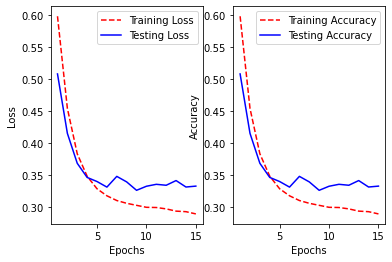

In [744]:
import matplotlib.pyplot as plt

# repeat all steps above ...

# get loss and accuracy histories for training and test sets
training_loss = history.history['loss']
test_loss = history.history['val_loss']
training_accuracy = history.history['accuracy']
test_accuracy = history.history['val_accuracy']

# create epochs count
epoch_count = range(1, len(training_loss) +1)

plt.figure()
# visualize loss history
plt.subplot(1,2,1)
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Testing Loss'])
plt.ylabel('Loss')
plt.xlabel('Epochs')
# visualize accuracy
plt.subplot(1,2,2)
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Accuracy', 'Testing Accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.show()

#### Reducing Overfitting with Weight Regularization

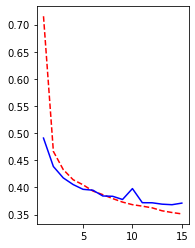

In [745]:
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2, l1

# set seed
np.random.seed(420)

# set nb features
nb_features = 1000

# load dataset into train and test set
(train_data, train_target), (test_data, test_target) = \
    imdb.load_data(num_words = nb_features)

# preprocess features with one hot encoder
tokenizer = Tokenizer(num_words = nb_features)
train_data = tokenizer.sequences_to_matrix(train_data, mode ='binary')
test_data = tokenizer.sequences_to_matrix(test_data, mode ='binary')

# create model
model = Sequential([
    Dense(units = 32, activation = 'relu',
          input_shape= (nb_features, ),
         kernel_regularizer = l2(0.01)),
    Dense(units = 64, activation = 'relu', 
         kernel_regularizer = l2(0.01)),
    Dense(units =1, activation ='sigmoid')
])

model.compile(loss = 'binary_crossentropy',
             optimizer ='rmsprop',
             metrics = ['accuracy'])

# fit model
results = model.fit(train_data, train_target, epochs = 15,
                    verbose =0, batch_size = 100,
                    validation_data = (test_data, test_target))

# get loss and accuracy history
train_loss = results.history['loss']
test_loss = results.history['val_loss']
train_accuracy = results.history['accuracy']
test_accuracy = results.history['val_accuracy']

# create epochs range
epoch_count = range(1, len(train_loss)+1)

# create plot
plt.figure()
plt.subplot(1,2,1)
plt.plot(epoch_count, train_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.show()

#### Reducing Overfitting with Early Stopping

In [749]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras.regularizers import l2,l1
from keras.callbacks import EarlyStopping, ModelCheckpoint

# set seed
np.random.seed(420)

# set nb featrues
nb_features = 1000

# load data
(train_data, train_target), (test_data, test_target) = \
    imdb.load_data(num_words = nb_features)

# preprocess features: one hot encoder
tokenizer = Tokenizer(num_words = nb_features)
train_data = tokenizer.sequences_to_matrix(train_data, mode ='binary')
test_data = tokenizer.sequences_to_matrix(test_data, mode ='binary')

# create model 
model = Sequential([
    Dense(units = 32, activation = 'relu', 
          input_shape = (nb_features,),
         kernel_regularizer= l1(0.01)),
    Dense(units = 34, activation = 'relu', 
         kernel_regularizer = l1(0.01)),
    Dense(units = 1, activation = 'sigmoid')
])

model.compile(loss='binary_crossentropy',
             optimizer ='rmsprop',
             metrics = ['accuracy'])

# set call back functions to save the best model
callbacks = [EarlyStopping(monitor='val_loss', patience =2),
            ModelCheckpoint(filepath = 'best_model.h5',
                           monitor = 'val_loss',
                           save_best_only=True)]

# fit model
results = model.fit(train_data, train_target, epochs = 15, verbose =0,
         callbacks = callbacks, batch_size = 100,
         validation_data=(test_data, test_target))


#### Reducing Overfitting with Dropout

In [ ]:
from keras.layers import Dense, Dropout
from keras.models import Sequential

model = Sequential([
    Dropout(0.2, input_shape=(nb_features, )),
    Dense(units=32, activation = 'relu'),
    Dropout(0.5),
    Dense(units = 64 , activation = 'relu'),
    Dropout(0.5),
    Dense(units = 1, activation='sigmoid')
])

model.compile(loss = 'binary_crossentropy',
             optimizer = 'rmsprop',
             metrics = ['accuracy'])

#### Saving Model Training Progress

In [757]:
import numpy as np
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.regularizers import l2,l1
from keras.preprocessing.text import Tokenizer
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.datasets import imdb

# set seed
np.random.seed(420)

# set nb features
nb_features = 1000

# load dtaa
(train_data, train_target), (test_data, test_target) = \
    imdb.load_data(num_words = nb_features)

# preprocess features into one hot encoder
tokenizer = Tokenizer(num_words = nb_features)
train_data = tokenizer.sequences_to_matrix(train_data,
                                           mode = 'binary')
test_data = tokenizer.sequences_to_matrix(test_data, 
                                         mode = 'binary')

# create model
model = Sequential([
    Dense(units = 32, activation = 'relu',
          input_shape=(nb_features,)),
    Dropout(0.5),
    Dense(units = 64, activation = 'relu',
         kernel_regularizer = l2(0.01)),
    Dropout(0.5),
    Dense(units = 1, activation = 'sigmoid')
])

model.compile(loss = 'binary_crossentropy',
             optimizer = 'rmsprop',
             metrics = ['accuracy'])

# Option 1: create early stopping function to save best model
callbacks = [EarlyStopping(monitor = 'val_accuracy', patience =2),
            ModelCheckpoint(monitor='val_accuracy',
                            save_best_only = True,
                           filepath = 'model.h5')]

# Option 2: save model
checkpoint = [ModelCheckpoint(filepath ='models.hdf5')]

# fit model
results = model.fit(train_data, train_target, epochs = 15,
                    verbose =1, callbacks = checkpoint,
         validation_data=(test_data, test_target))


Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 6s 237us/step - loss: 0.5646 - accuracy: 0.7674 - val_loss: 0.3615 - val_accuracy: 0.8580
Epoch 2/15
25000/25000 [==============================] - 3s 103us/step - loss: 0.3827 - accuracy: 0.8497 - val_loss: 0.3442 - val_accuracy: 0.8615
Epoch 3/15
25000/25000 [==============================] - 3s 103us/step - loss: 0.3557 - accuracy: 0.8621 - val_loss: 0.3451 - val_accuracy: 0.8593
Epoch 4/15
25000/25000 [==============================] - 3s 104us/step - loss: 0.3447 - accuracy: 0.8666 - val_loss: 0.3499 - val_accuracy: 0.8553
Epoch 5/15
25000/25000 [==============================] - 3s 105us/step - loss: 0.3345 - accuracy: 0.8718 - val_loss: 0.3377 - val_accuracy: 0.8627
Epoch 6/15
25000/25000 [==============================] - 3s 102us/step - loss: 0.3276 - accuracy: 0.8764 - val_loss: 0.3395 - val_accuracy: 0.8617
Epoch 7/15
25000/25000 [==============================] - 3s 1

#### k-Fold Cross-Validating Neural Networks

In [766]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2,l1
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# set seed
np.random.seed(420)

# generate data
features, target = make_classification(n_samples =1000,
                                      n_features = 3, 
                                      n_informative = 3,
                                       n_redundant = 0,
                                       weights = [.5, .5],
                                      random_state = 0,
                                      n_classes = 2)

# splits train and test set
train_data, test_data, train_target, test_target = \
    train_test_split(features, target, test_size = 0.2)

# make model
def create_network():
    network = Sequential([
        Dense(units = 16, activation = 'relu', 
              input_shape = (train_data.shape[1],)),
        #Dropout(0.5),
        Dense(units = 32, activation = 'relu'),
       # Dropout(0.5),
        Dense(units = 1, activation='sigmoid')        
    ])
    
    network.compile(loss = 'binary_crossentropy',
                   optimizer = 'rmsprop',
                   metrics = ['accuracy'])
    
    return network

# wrap keras model
model = KerasClassifier(build_fn = create_network, verbose =1,
                       epochs= 10, batch_size = 100 )

# evaluate model
cross_val_score(model, train_data, train_target, cv=3)

# we want to evaluate the model on a smaller dataset to ensure
# that we don't spend days training a model with the wrong
# architecture

Epoch 1/10
533/533 [==============================] - 0s 222us/step - loss: 0.7776 - accuracy: 0.2608
Epoch 2/10
533/533 [==============================] - 0s 19us/step - loss: 0.7181 - accuracy: 0.3959
Epoch 3/10
533/533 [==============================] - 0s 23us/step - loss: 0.6831 - accuracy: 0.5610
Epoch 4/10
533/533 [==============================] - 0s 19us/step - loss: 0.6555 - accuracy: 0.6229
Epoch 5/10
533/533 [==============================] - 0s 21us/step - loss: 0.6300 - accuracy: 0.6829
Epoch 6/10
533/533 [==============================] - 0s 19us/step - loss: 0.6053 - accuracy: 0.7767
Epoch 7/10
533/533 [==============================] - 0s 19us/step - loss: 0.5823 - accuracy: 0.8293
Epoch 8/10
533/533 [==============================] - 0s 18us/step - loss: 0.5593 - accuracy: 0.8386
Epoch 9/10
533/533 [==============================] - 0s 19us/step - loss: 0.5377 - accuracy: 0.8574
Epoch 10/10
267/267 [==============================] - 0s 159us/step
Epoch 1/10
533/533 [=

array([0.88389516, 0.83146065, 0.89097744])

#### Tuning Neural Networks

In [769]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l1,l2
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import make_classification

# sets seed
np.random.seed(420)
nb_features = 3


# generate data
features, target = make_classification(n_samples = 1000, 
                                      n_features = nb_features,
                                      n_classes = 2,
                                      random_state = 0,
                                       n_redundant = 0,
                                      weights = [.5,.5],
                                      n_informative = nb_features)
# split data
train_data, test_data, train_target , test_target = \
    train_test_split(features, target,test_size = 0.2)

# create model
def create_network(optimizer):
    network = Sequential([
        Dense(units = 16, activation = 'relu',
             input_shape=(nb_features, )),
        Dense(units = 32, activation = 'relu'),
        Dense(units = 1, activation='sigmoid')
    ])
    
    network.compile(loss='binary_crossentropy',
                   optimizer= optimizer,
                   metrics=['accuracy'])
    
    return network

# wrap network
model = KerasClassifier(build_fn = create_network, verbose = 0)

# Create search range
epochs=[5,10]
batches = [5,10,100]
optimizers = ['rmsprop', 'adam']

# create hyperparameters options
hyperparameters = dict(epochs = epochs, batch_size = batches,
                      optimizer = optimizers)

# create gird search
grid_search = GridSearchCV(estimator = model, 
                           param_grid= hyperparameters)

# fit grid search
results = grid_search.fit(train_data, train_target)

# view best parameters
results.best_params_



{'batch_size': 10, 'epochs': 10, 'optimizer': 'adam'}

#### Visualizing Neural Networks with model_to_dot or plot_model

In [782]:
from IPython.display import SVG
import pydotplus
import keras
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

# SVG(model_to_dot(model, show_shapes = True).create(
#    prog = 'dot', format = 'svg'))

# save model as image
# plot_model(model, show_shapes =True, to_file='model.png')

#### Classifying Images

In [840]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils.np_utils import to_categorical
from keras import backend as K
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

# set seed
np.random.seed(520)

# load data
(train_data, train_target), (test_data, test_target) = mnist.load_data()

# normalize image
train_data = train_data/255
test_data = test_data/255

# reshape features
train_data = train_data.reshape(train_data.shape[0],
                               channels, height, width)
test_data = test_data.reshape(test_data.shape[0],
                               channels, height, width)


print(train_data.shape)
print(train_target.shape)

# set images information
channels = 1
width = 28
height = 28
nb_classes = 10

network = Sequential([
    Conv2D(filters = 64, activation = 'relu', kernel_size = (5,5),
          input_shape=( width, height, channels)),
    MaxPooling2D(pool_size = (2,2)),
    Flatten(),
    Dense(units =128, activation = 'relu'),
    Dense(nb_classes)
])

network.compile(loss = 'sparse_categorical_crossentropy',
               optimizer = 'rmsprop',
               metrics = ['accuracy'])

network.fit(train_data, train_target, epochs = 5, verbose =1,
           batch_size =100, 
           validation_data = (test_data, test_target))


(60000, 1, 28, 28)
(60000,)


AttributeError: module 'tensorflow_core._api.v2.config' has no attribute 'experimental_list_devices'

####  Improving Performance with Image Augmentation

#### Classifying Text using Long-Short Term Memory

In [845]:
import numpy as np
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Embedding, LSTM

# Set random seed
np.random.seed(0)

# Set the number of features we want
number_of_features = 1000

# Load data and target vector from movie review data
(data_train, target_train), (data_test, target_test) = imdb.load_data(
 num_words=number_of_features)


# padding 
features_train = sequence.pad_sequences(data_train, maxlen=400)
features_test = sequence.pad_sequences(data_test, maxlen=400)

network = Sequential([
    Embedding(input_dim = number_of_features, output_dim = 128),
    LSTM(128),
    Dense(units =1, activation ='sigmoid')
])

network.compile(loss= 'binary_crossentropy',
               optimizer ='Adam',
               metrics = ['accuracy'])

history = network.fit(features_train, # Features
 target_train, # Target
epochs=3, # Number of epochs
 verbose=1, # Do not print description after each epoch
 batch_size=100, # Number of observations per batch
 validation_data=(features_test, target_test))

c:\users\emuli\appdata\local\programs\python\python37\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/3
 6400/25000 [======>.......................] - ETA: 7:41 - loss: 0.6307 - accuracy: 0.6355

KeyboardInterrupt: 

## Chap 21: Saving and Loading Trained Models 